# HOUSING: PRICE PREDICTION PROJECT

## Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

### Business Goal:
To model the price of houses with the available independent variables. This model will then be used by the management to  understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

#### Importing necessary libraries

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [350]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns',None)

In [351]:
housedf = pd.read_csv('train.csv')

In [352]:
housedf_test = pd.read_csv('test.csv')

In [353]:
housedf.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    127         120       RL          NaN     4928   Pave   NaN      IR1   
1    889          20       RL         95.0    15865   Pave   NaN      IR1   
2    793          60       RL         92.0     9920   Pave   NaN      IR1   
3    110          20       RL        105.0    11751   Pave   NaN      IR1   
4    422          20       RL          NaN    16635   Pave   NaN      IR1   
5   1197          60       RL         58.0    14054   Pave   NaN      IR1   
6    561          20       RL          NaN    11341   Pave   NaN      IR1   
7   1041          20       RL         88.0    13125   Pave   NaN      Reg   
8    503          20       RL         70.0     9170   Pave   NaN      Reg   
9    576          50       RL         80.0     8480   Pave   NaN      Reg   
10   449          50       RM         50.0     8600   Pave   NaN      Reg   
11   833          60       RL         44.0     9548   Pave   NaN      IR1   
12   277          20       RL        129.0     9196   Pave   NaN      IR1   
13    84          20       RL         80.0     8892   Pave   NaN      IR1   
14   888          50       RL         59.0    16466   Pave   NaN      IR1   
15  1013          70       RL         55.0    10592   Pave   NaN      Reg   
16  1154          30       RM          NaN     5890   Pave   NaN      Reg   
17   728          20       RL         64.0     7314   Pave   NaN      Reg   
18   270          20       RL          NaN     7917   Pave   NaN      IR1   
19  1105         160       RM         24.0     2016   Pave   NaN      Reg   
20   259          60       RL         80.0    12435   Pave   NaN      Reg   
21  1407          85       RL         70.0     8445   Pave   NaN      Reg   
22  1459          20       RL         68.0     9717   Pave   NaN      Reg   
23   997          20       RL          NaN    10659   Pave   NaN      IR1   
24  1094          20       RL         71.0     9230   Pave   NaN      Reg   
25   114          20       RL          NaN    21000   Pave   NaN      Reg   
26  1384          30       RL          NaN    25339   Pave   NaN      Reg   
27   379          20       RL         88.0    11394   Pave   NaN      Reg   
28   556          45       RM         58.0     6380   Pave   NaN      Reg   
29   464          70       RL         74.0    11988   Pave   NaN      IR1   
30    46         120       RL         61.0     7658   Pave   NaN      Reg   
31   426          60       RM         60.0     3378   Pave  Grvl      Reg   
32  1231          90       RL          NaN    18890   Pave   NaN      IR1   
33   171          50       RM          NaN    12358   Pave   NaN      IR1   
34   869          60       RL          NaN    14762   Pave   NaN      IR2   
35   151          20       RL        120.0    10356   Pave   NaN      Reg   
36   859          20       RL         80.0    10400   Pave   NaN      Reg   
37   176          20       RL         84.0    12615   Pave   NaN      Reg   
38   361          85       RL          NaN     7540   Pave   NaN      IR1   
39   590          40       RM         50.0     9100   Pave   NaN      Reg   
40   172          20       RL        141.0    31770   Pave   NaN      IR1   
41   527          20       RL         70.0    13300   Pave   NaN      Reg   
42  1365         160       FV         30.0     3180   Pave  Pave      Reg   
43   146         160       RM         24.0     2522   Pave   NaN      Reg   
44  1006          80       RL         65.0     8385   Pave   NaN      Reg   
45   275          20       RL         76.0     8314   Pave   NaN      Reg   
46   380          60       RL         60.0     8123   Pave   NaN      IR1   
47  1309          20       RM        100.0    12000   Pave   NaN      Reg   
48   534          20       RL         50.0     5000   Pave   NaN      Reg   
49   494          20       RL         70.0     7931   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0     

In [354]:
housedf.shape

(1168, 81)

#### Test data

In [355]:
housedf_test.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   
5   650         180       RM         21.0     1936   Pave   NaN      Reg   
6  1453         180       RM         35.0     3675   Pave   NaN      Reg   
7   152          20       RL        107.0    13891   Pave   NaN      Reg   
8   427          80       RL          NaN    12800   Pave   NaN      Reg   
9   776         120       RM         32.0     4500   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
5         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
6         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
7         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
8         Low    AllPub    Inside       Mod      SawyerW       Norm   
9         Lvl    AllPub       FR2       Gtl      Mitchel       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   
5       Norm    Twnhs     SFoyer            4            6       1970   
6       Norm   TwnhsE       SLvl            5            5       2005   
7       Norm     1Fam     1Story            8            5       2007   
8       Norm     1Fam       SLvl            7            5       1989   
9       Norm   TwnhsE     1Story            6            5       1998   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
5          1970     Gable  CompShg     CemntBd     CmentBd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
7          2008       Hip  CompShg     VinylSd     VinylSd      Stone   
8          1989     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
9          1998       Hip  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   
5         0.0        TA        TA     CBlock       Gd       TA           Av   
6        80.0        TA        TA      PConc       Gd       TA           Gd   
7       436.0        Gd        TA      PConc       Ex       TA           Gd   
8       145.0        Gd        TA      PConc       Gd       TA     

In [356]:
housedf_test.shape

(292, 80)

one column is missing fron test dataset, to find the column missing from test dataset

In [357]:
housedf.columns.difference(housedf_test.columns) 

Index(['SalePrice'], dtype='object')

###  Description of data


Data contains 1460 entries each having 81 variables.

MSSubClass: Identifies the type of dwelling involved in the sale.	

MSZoning: Identifies the general zoning classification of the sale.
		
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property
    
Alley: Type of alley access to property

LotShape: General shape of property
      
LandContour: Flatness of the property
		
Utilities: Type of utilities available
	
LotConfig: Lot configuration
	
LandSlope: Slope of property
	
Neighborhood: Physical locations within Ames city limits
			
Condition1: Proximity to various conditions
	
Condition2: Proximity to various conditions (if more than one is present)
	
BldgType: Type of dwelling
	
HouseStyle: Style of dwelling
	
OverallQual: Rates the overall material and finish of the house
	
OverallCond: Rates the overall condition of the house
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof
		
RoofMatl: Roof material
		
Exterior1st: Exterior covering on house
	
Exterior2nd: Exterior covering on house (if more than one material)
	
MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
ExterCond: Evaluates the present condition of the material on the exterior
		
Foundation: Type of foundation
		
BsmtQual: Evaluates the height of the basement
		
BsmtCond: Evaluates the general condition of the basement
	
BsmtExposure: Refers to walkout or garden level walls
	
BsmtFinType1: Rating of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
HeatingQC: Heating quality and condition
		
CentralAir: Central air conditioning

Electrical: Electrical system
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality
		
GarageType: Garage location
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality
		
GarageCond: Garage condition
		
PavedDrive: Paved driveway
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
Fence: Fence quality
	
MiscFeature: Miscellaneous feature not covered in other categories
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
SaleCondition: Condition of sale

#### Target Column: 

SalePrice


In [358]:
#Checking the columns
housedf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [359]:
#Seeing the information of the columns
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

housedf has 3 float, 35 integer and 43 object type data

#### checking for null values

In [360]:
housedf[housedf.columns[housedf.isnull().any()]]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0             NaN   NaN       None         0.0       Gd       TA           No   
1            95.0   NaN       None         0.0       TA       Gd           Gd   
2            92.0   NaN       None         0.0       Gd       TA           Av   
3           105.0   NaN    BrkFace       480.0       Gd       TA           No   
4             NaN   NaN      Stone       126.0       Gd       TA           No   
5            58.0   NaN       None         0.0       Gd       TA           Av   
6             NaN   NaN    BrkFace       180.0       Gd       TA           No   
7            88.0   NaN     BrkCmn        67.0       TA       TA           No   
8            70.0   NaN       None         0.0       TA       TA           No   
9            80.0   NaN       None         0.0       TA       TA           No   
10           50.0   NaN       None         0.0       TA       TA           No   
11           44.0   NaN    BrkFace       223.0       Gd       TA           No   
12          129.0   NaN       None         0.0       Ex       TA           No   
13           80.0   NaN     BrkCmn        66.0       TA       TA           No   
14           59.0   NaN       None         0.0       TA       TA           No   
15           55.0   NaN       None         0.0       TA       Fa           No   
16            NaN   NaN       None         0.0       TA       TA           Av   
17           64.0   NaN      Stone        82.0       Gd       TA           Av   
18            NaN   NaN    BrkFace       174.0       TA       Gd           No   
19           24.0   NaN    BrkFace       304.0       TA       TA           No   
20           80.0   NaN    BrkFace       172.0       Gd       TA           No   
21           70.0   NaN       None         0.0       Gd       TA           Av   
22           68.0   NaN       None         0.0       TA       TA           Mn   
23            NaN   NaN       None         0.0       TA       TA           No   
24           71.0   NaN    BrkFace       166.0       TA       TA           Mn   
25            NaN   NaN    BrkFace       184.0       Gd       TA           Mn   
26            NaN   NaN       None         0.0       TA       TA           No   
27           88.0   NaN      Stone       350.0       Ex       TA           Av   
28           58.0   NaN       None         0.0       TA       Fa           No   
29           74.0   NaN       None         0.0       TA       TA           No   
30           61.0   NaN    BrkFace       412.0       Ex       TA           No   
31           60.0  Grvl       None         0.0       TA       TA           No   
32            NaN   NaN       None         1.0       Gd       TA           No   
33            NaN   NaN       None         0.0       TA       TA           No   
34            NaN   NaN       None         0.0      NaN      NaN          NaN   
35          120.0   NaN       None         0.0       TA       TA           Av   
36           80.0   NaN    BrkFace       189.0       Gd       TA           No   
37           84.0   NaN       None         0.0       TA       Gd           Av   
38            NaN   NaN       None         0.0       Gd       TA           Av   
39           50.0   NaN       None         0.0       TA       TA           No   
40          141.0   NaN      Stone       112.0       TA       Gd           Gd   
41           70.0   NaN       None         0.0       Gd       TA           No   
42           30.0  Pave       None         0.0       Gd       TA           No   
43           24.0   NaN      Stone        50.0       Gd       TA           No   
44           65.0   NaN    BrkFace       220.0       Gd       Gd           Av   
45           76.0   NaN       None         0.0       TA       TA           Gd   
46           60.0   NaN    BrkFace        16.0       Gd       TA           No   
47          100.0   NaN       None         0.0       TA       TA           No   
48           50.0   NaN       None   

There are 18 columns in train dataframe with null values.


In [361]:
housedf_test[housedf_test.columns[housedf_test.isnull().any()]]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0           86.0   NaN      Stone       200.0       Ex       TA           Gd   
1            NaN   NaN       None         0.0       Gd       TA           Av   
2            NaN   NaN       None         0.0       Gd       TA           Av   
3           75.0   NaN       None         0.0       TA       TA           No   
4           86.0   NaN      Stone        74.0       Gd       TA           Mn   
5           21.0   NaN       None         0.0       Gd       TA           Av   
6           35.0   NaN    BrkFace        80.0       Gd       TA           Gd   
7          107.0   NaN      Stone       436.0       Ex       TA           Gd   
8            NaN   NaN    BrkFace       145.0       Gd       TA           Gd   
9           32.0   NaN    BrkFace       320.0       Ex       TA           No   
10          60.0   NaN       None         0.0       TA       TA           No   
11           NaN   NaN       None         0.0       TA       TA           No   
12         100.0   NaN       None         0.0       TA       TA           No   
13          50.0   NaN    BrkFace       226.0       TA       TA           Gd   
14         110.0   NaN    BrkFace       375.0       Gd       TA           Av   
15          50.0  Grvl       None         0.0       TA       Gd           No   
16           NaN   NaN       None         0.0       TA       TA           No   
17          70.0   NaN       None         0.0       TA       TA           No   
18          35.0   NaN    BrkFace       218.0       Gd       TA           No   
19          44.0   NaN       None         0.0       Gd       Gd           No   
20          50.0   NaN       None         0.0       TA       TA           No   
21          71.0   NaN    BrkFace       148.0       TA       TA           No   
22           NaN   NaN    BrkFace       196.0       TA       TA           No   
23          70.0   NaN       None         0.0      NaN      NaN          NaN   
24          52.0   NaN       None         0.0       Gd       TA           Mn   
25          37.0   NaN       None         0.0       TA       TA           No   
26          62.0   NaN       None         0.0       Gd       TA           No   
27          78.0   NaN    BrkFace       200.0       TA       TA           No   
28          90.0   NaN    BrkFace       420.0       TA       TA           No   
29          60.0   NaN       None         0.0       TA       Fa           No   
30          68.0   NaN       None         0.0      NaN      NaN          NaN   
31          67.0   NaN        NaN         NaN       Gd       TA           No   
32          70.0   NaN       None         0.0       Gd       TA           No   
33          80.0   NaN    BrkFace       387.0       TA       TA           No   
34          52.0   NaN       None         0.0       TA       TA           No   
35          76.0   NaN       None         0.0       Gd       TA           No   
36          70.0   NaN    BrkFace       105.0       Gd       Gd           No   
37          21.0   NaN    BrkFace       268.0       TA       TA           No   
38           NaN   NaN       None         0.0       TA       Gd           No   
39          24.0   NaN       None         0.0       TA       TA           No   
40          50.0   NaN       None         0.0       TA       TA           No   
41          80.0   NaN    BrkFace       473.0       Gd       TA           No   
42           NaN   NaN       None         0.0       Gd       TA           Gd   
43          62.0  Pave       None         0.0       Gd       TA           No   
44          57.0   NaN       None         0.0       Gd       TA           Av   
45          52.0   NaN       None         0.0       TA       Fa           No   
46          70.0   NaN       None         0.0       TA       TA           No   
47          30.0  Grvl       None         0.0       Fa       TA           No   
48          34.0   NaN      Stone       166.0       Gd       TA           No   
49   

There are 19 columns in test dataframe with null values.

In [362]:
housedf.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [363]:
housedf_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

### visualising null values in test dataset

<AxesSubplot:>

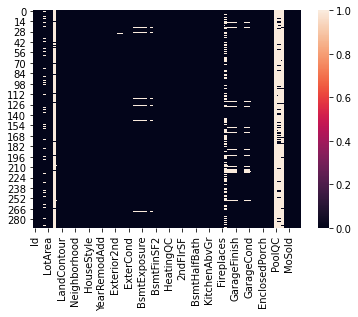

In [364]:
sns.heatmap(housedf_test.isnull())

Columns titled: Alley, PoolQC,MiscFeature,FireplaceQu,Fence have extremely sparse data with overwhelmingly high percentage of null values and therefore must be dropped.

In [365]:
housedf.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence'],inplace=True)

In [366]:
housedf_test.drop(columns=['Alley','PoolQC','MiscFeature','FireplaceQu','Fence'],inplace=True)

In [367]:
housedf.shape

(1168, 76)

In [368]:
housedf_test.shape

(292, 75)

Dropping the ID columns from test and train datasets, since they don't contribute to building a good model for predicting the target variable values.

In [369]:
housedf.drop(columns=['Id'],inplace=True)

In [370]:
housedf_test.drop(columns=['Id'],inplace=True)

In [371]:
housedf.dtypes[housedf.dtypes == 'object'] #Identifying the Categorical Columns

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [372]:
housedf.dtypes[housedf.dtypes != 'object'] #Identifying the non-object type Columns

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [373]:
housedf[housedf.columns[housedf.isnull().any()]].shape

(1168, 13)

In [374]:
housedf_test[housedf_test.columns[housedf_test.isnull().any()]].shape

(292, 14)

#### Finding the null value percentage in each of the columns in train dataset

In [375]:
for n in housedf[housedf.columns[housedf.isnull().any()]]:
    perct = housedf[n].isnull().sum()/1168*100
    print(f"null value % in {n} is: {perct}")

null value % in LotFrontage is: 18.32191780821918
null value % in MasVnrType is: 0.5993150684931506
null value % in MasVnrArea is: 0.5993150684931506
null value % in BsmtQual is: 2.5684931506849313
null value % in BsmtCond is: 2.5684931506849313
null value % in BsmtExposure is: 2.654109589041096
null value % in BsmtFinType1 is: 2.5684931506849313
null value % in BsmtFinType2 is: 2.654109589041096
null value % in GarageType is: 5.47945205479452
null value % in GarageYrBlt is: 5.47945205479452
null value % in GarageFinish is: 5.47945205479452
null value % in GarageQual is: 5.47945205479452
null value % in GarageCond is: 5.47945205479452


#### Finding the null value percentage in each of the columns in test dataset

In [376]:
for n in housedf_test[housedf_test.columns[housedf_test.isnull().any()]]:
    perct = housedf_test[n].isnull().sum()/292*100
    print(f"null value % in {n} is: {perct}")

null value % in LotFrontage is: 15.41095890410959
null value % in MasVnrType is: 0.3424657534246575
null value % in MasVnrArea is: 0.3424657534246575
null value % in BsmtQual is: 2.3972602739726026
null value % in BsmtCond is: 2.3972602739726026
null value % in BsmtExposure is: 2.3972602739726026
null value % in BsmtFinType1 is: 2.3972602739726026
null value % in BsmtFinType2 is: 2.3972602739726026
null value % in Electrical is: 0.3424657534246575
null value % in GarageType is: 5.821917808219178
null value % in GarageYrBlt is: 5.821917808219178
null value % in GarageFinish is: 5.821917808219178
null value % in GarageQual is: 5.821917808219178
null value % in GarageCond is: 5.821917808219178


In [377]:
housedf[housedf.columns[housedf.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   954 non-null    float64
 1   MasVnrType    1161 non-null   object 
 2   MasVnrArea    1161 non-null   float64
 3   BsmtQual      1138 non-null   object 
 4   BsmtCond      1138 non-null   object 
 5   BsmtExposure  1137 non-null   object 
 6   BsmtFinType1  1138 non-null   object 
 7   BsmtFinType2  1137 non-null   object 
 8   GarageType    1104 non-null   object 
 9   GarageYrBlt   1104 non-null   float64
 10  GarageFinish  1104 non-null   object 
 11  GarageQual    1104 non-null   object 
 12  GarageCond    1104 non-null   object 
dtypes: float64(3), object(10)
memory usage: 118.8+ KB


Majority of the columns with null values is of object datatype

In [378]:
housedf_test[housedf_test.columns[housedf_test.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   247 non-null    float64
 1   MasVnrType    291 non-null    object 
 2   MasVnrArea    291 non-null    float64
 3   BsmtQual      285 non-null    object 
 4   BsmtCond      285 non-null    object 
 5   BsmtExposure  285 non-null    object 
 6   BsmtFinType1  285 non-null    object 
 7   BsmtFinType2  285 non-null    object 
 8   Electrical    291 non-null    object 
 9   GarageType    275 non-null    object 
 10  GarageYrBlt   275 non-null    float64
 11  GarageFinish  275 non-null    object 
 12  GarageQual    275 non-null    object 
 13  GarageCond    275 non-null    object 
dtypes: float64(3), object(11)
memory usage: 32.1+ KB


Majority of the columns witll null values is of object datatype

In [379]:
housedf['LotFrontage'].mode()

0    60.0
dtype: float64

In [380]:
(housedf['MasVnrArea']==0.0).sum()/housedf['MasVnrArea'].count()*100 #checking the % share of most frequently occuring value.

59.60378983634798

In [381]:
(housedf['MasVnrType']=='None').value_counts()

True     696
False    472
Name: MasVnrType, dtype: int64

#### Using KNN Imputation technique for imputing missing data in LotFrontage .

In [382]:
from sklearn.impute import KNNImputer

In [383]:
imp = KNNImputer(n_neighbors=2)

In [384]:
housedf[['LotFrontage']] = imp.fit_transform(housedf[['LotFrontage']])

In [385]:
housedf[['LotFrontage']].isnull().sum()

LotFrontage    0
dtype: int64

There are no more null values in LotFrontage column

In [386]:
(housedf['MasVnrArea']==0.0).sum()/housedf['MasVnrArea'].count()*100 #checking the % share of most frequently occuring value.

59.60378983634798

#### Imputing The mose frequently occuring values to NaN values in each of the columns

In [387]:
from sklearn.impute import SimpleImputer

In [388]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [389]:
si = si.fit(housedf[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [390]:
housedf[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = si.transform(housedf[['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [391]:
housedf.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

There are no more null values present.

#### Using KNN Imputation technique for imputing missing data in LotFrontage in test dataset .

In [392]:
from sklearn.impute import KNNImputer

In [393]:
imp = KNNImputer(n_neighbors=2)

In [394]:
housedf_test[['LotFrontage']] = imp.fit_transform(housedf_test[['LotFrontage']])

In [395]:
housedf_test[['LotFrontage']].isnull().sum()

LotFrontage    0
dtype: int64

There are no more null values in LotFrontage column

#### Imputing The mose frequently occuring values to NaN values in each of the columns in test dataset

In [396]:
from sklearn.impute import SimpleImputer

In [397]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [398]:
si = si.fit(housedf_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [399]:
housedf_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']] = si.transform(housedf_test[['MasVnrType','Electrical','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']])

In [400]:
housedf_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

There are no more null values present.

### Statistical Summary

In [401]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [402]:
housedf.dtypes[housedf.dtypes == 'object'] #Identifying the object type Columns

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [403]:
housedf.dtypes[housedf.dtypes != 'object'] #Identifying the non object type Columns

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [404]:
housedf.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295  1979.717466   
std        0.817229      0.216292      1.598484     0.650575    25.012983   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1984.500000   
75%        3.000000      1.000000      7.000000     1.000000  2003.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

Big difference between max value and 75% in SalePrice,MSSubClass,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2, etc indicates presence of outliers.

higher std than mean in columns: MasVnrArea,BsmtFinSF1,BsmtFinSF2,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch etc indicates presence of skewness.	

### Interpreting Relationship between Independent  and Dependent Variables

Analyzing the continuous data type Target column

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

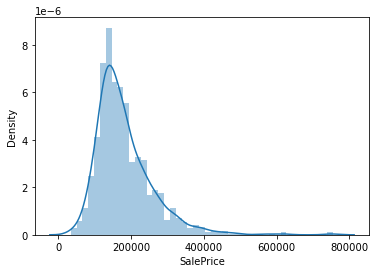

In [405]:
sns.distplot(housedf.SalePrice)

From the graph above it is observed that the Price data forms a continuous distribution with mean of 181477.00 and tails off from 400000 mark.

In [406]:
housedf.SalePrice.skew()

1.953877705368286

Distribution is skewed

<AxesSubplot:xlabel='SalePrice'>

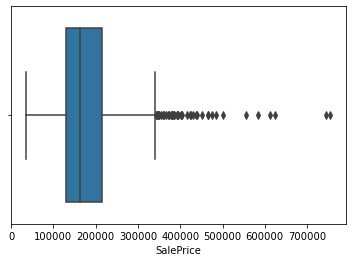

In [407]:
sns.boxplot(housedf.SalePrice)

There are outliers present in the data column

#### Analyzing the Feature Columns

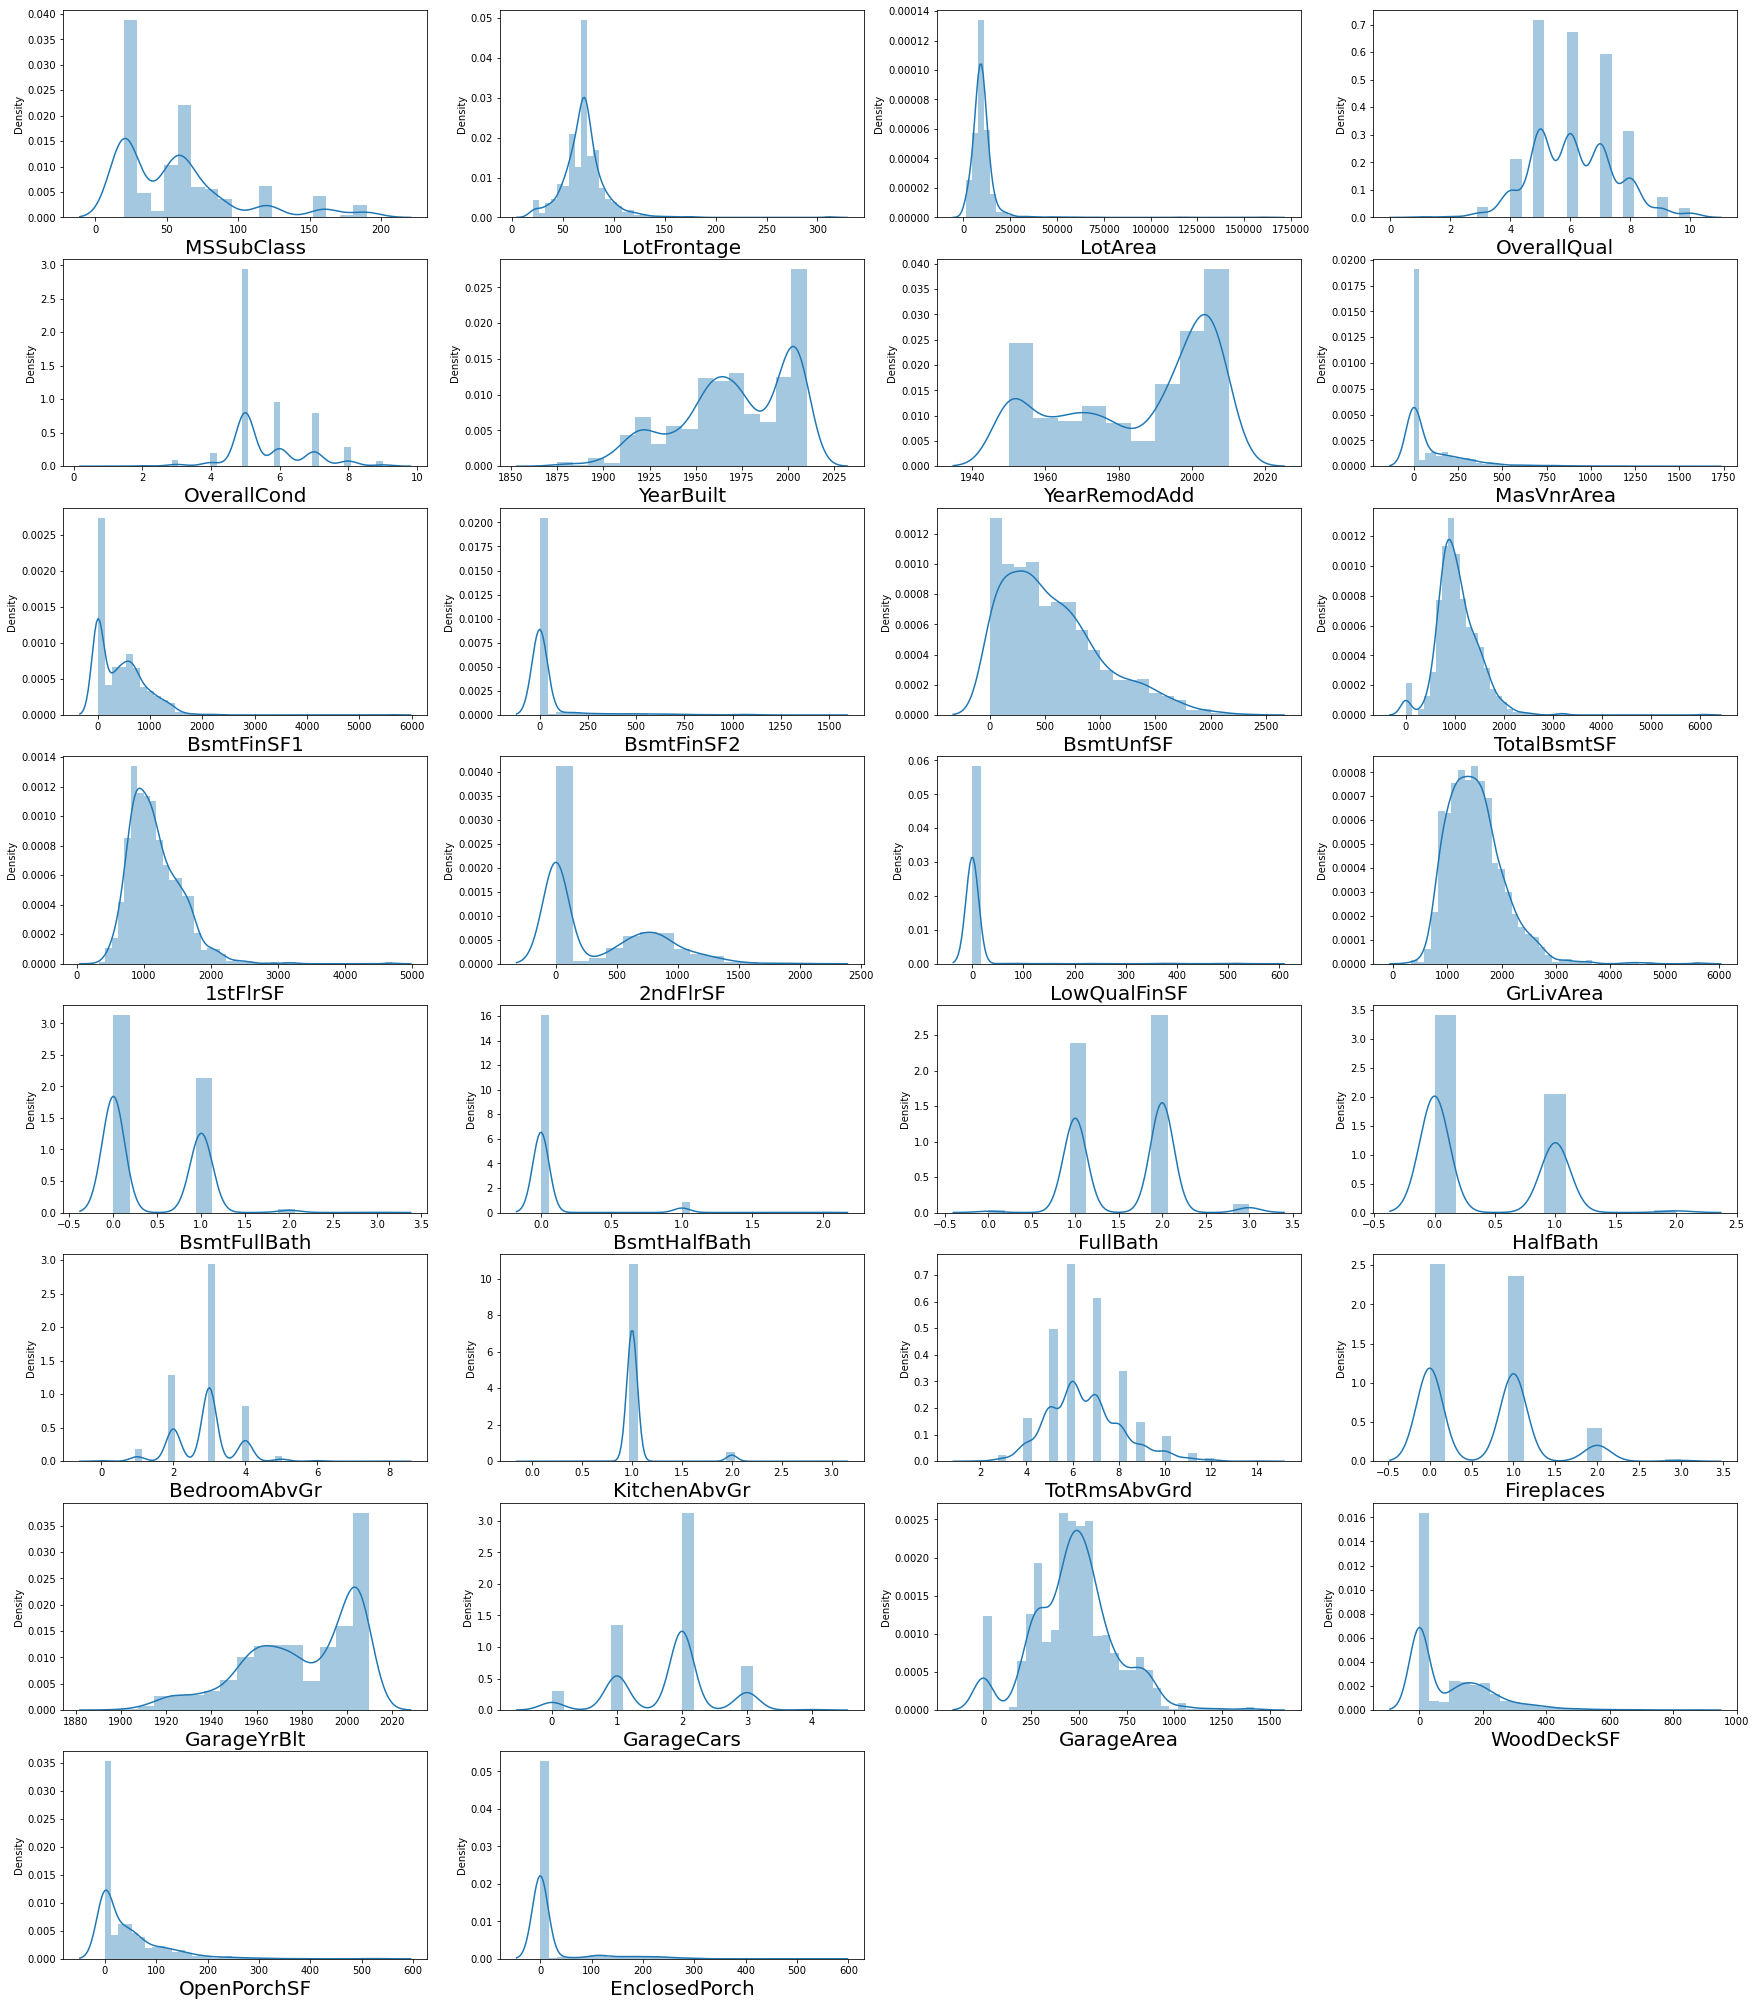

In [408]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in housedf[housedf.columns[housedf.dtypes != 'object']]:
    if plotnum<=30:
        plt.subplot(10,4,plotnum)
        sns.distplot(housedf[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnFSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch are skewed and contain outliers

In [409]:
housedf[housedf.columns[housedf.dtypes != 'object']].skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.708074
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

Considerable skewness exists in columns

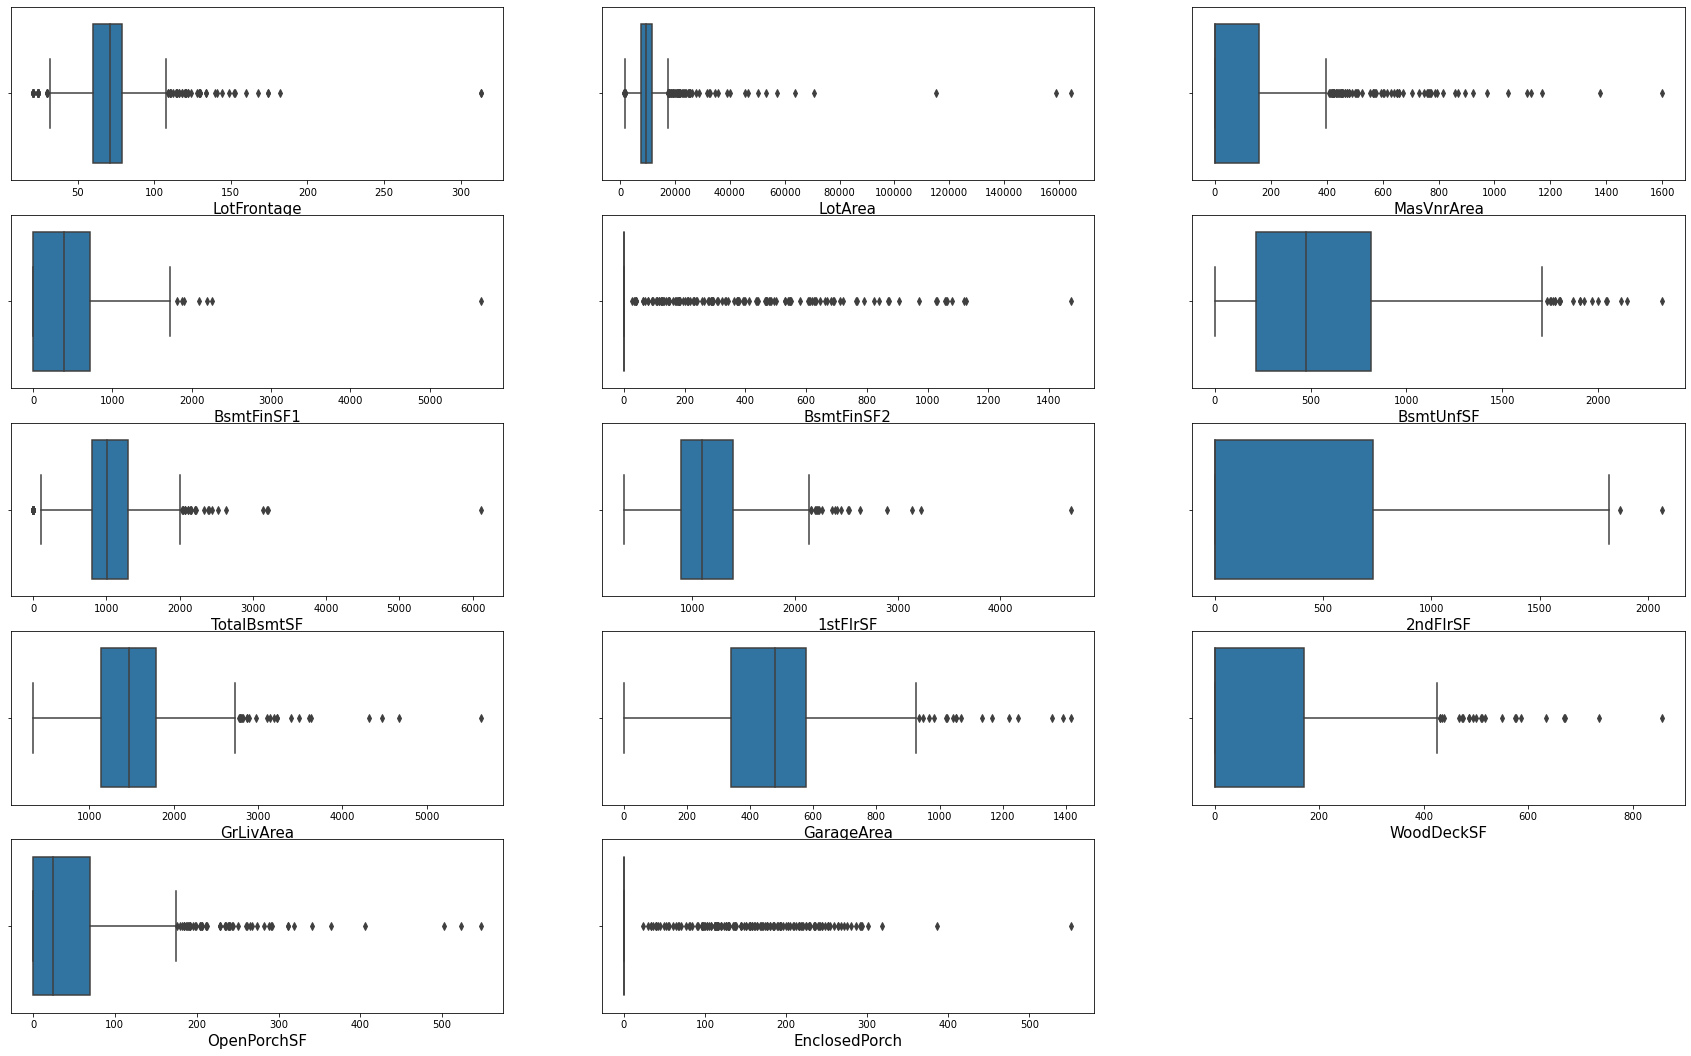

In [410]:
plt.figure(figsize=(30,30),facecolor='white')
plotnum=1
for col in housedf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]:
    if plotnum<=20:
        plt.subplot(8,3,plotnum)
        sns.boxplot(housedf[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are considerable outliers in the columns.

#### Checking for Skewness in Data

In [411]:
housedf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
dtype: float64

There is considerable skewness in the columns

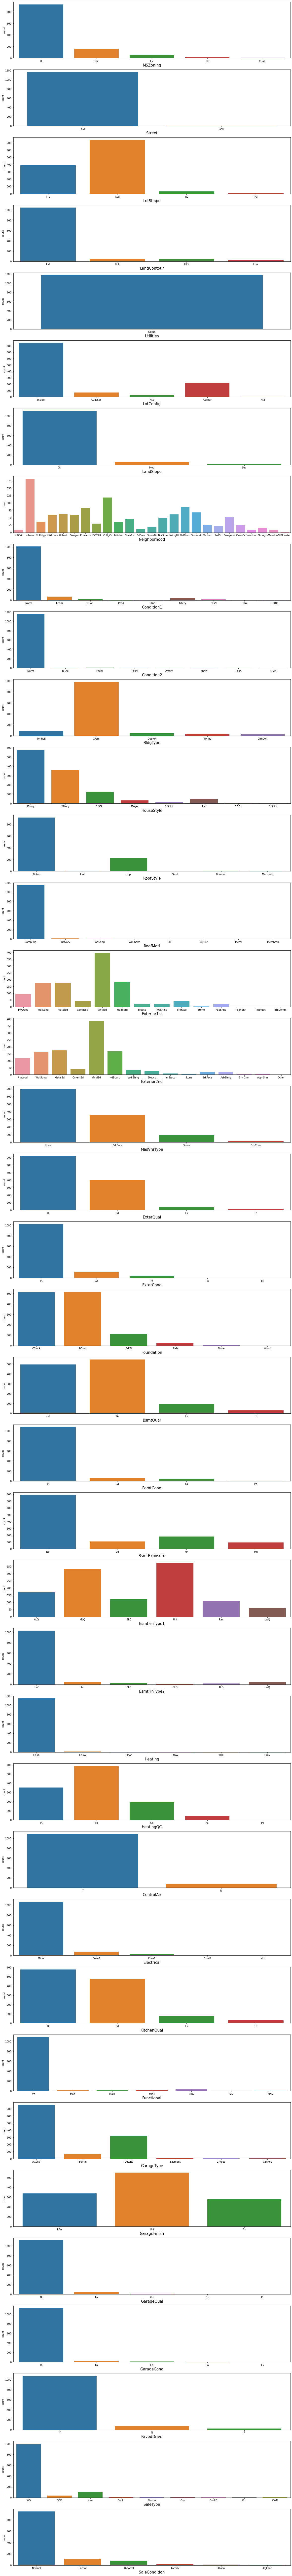

In [412]:
plt.figure(figsize=(20,200),facecolor='white')
plotnum=1
for col in housedf[housedf.columns[housedf.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(40,1,plotnum)
        sns.countplot(housedf[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

##### Following observations are made from above graphs:

    Residential Low Density is the most common zoing classification
    
    Most common Street Type is 'Pave'
    
    Regular is the most common LotShape, followed by Slightly irregular
    
    Most Properties have Near Flat/Level LandContour
    
    All public Utilities are available
    
    Inside lot is the most common Lot configuration
    
    Slope of property land is most commonly gentle
    
    Most Housing properties are situated in Neighborhoods of North Ames, followed by College Creek,Edwards and Old Town
    
    Most Housing properties are in proximity to Normal conditions
    
    Most Housing properties are of Single-family Detached type
    
    Most Housing properties 1 storied and 2 storied
    
    Most Houses have Gable roof style
    
    Most Houses have roofs made of Standard (Composite) Shingle
    
    Vinyl Siding is the most common exterior covering used
    
    Most Houses don't have a Masonry veneer type while some have Brick Face
    
    The quality of the material on the exterior is most commonly average/typical
    
    The present condition of the material on the exterior is most commonly average/typical
    
    Two of the most common foundation types are Cinder Block and Poured Contrete
    
    The height of the basement is usually either Typical (80-89 inches) or Good (90-99 inches)
    
    The general condition of the basement is commonly Typical with slight dampness
    
    Basements most commonly have no exposure
    
    Most houses have Basements that are usually unfinished followed by houses with basements having Good Living Quarters
    
    Most houses have Gas forced warm air furnace heating arrangement
    
    Most houses have Excellent Heating quality and condition
    
    Most houses have Central air conditioning
    
    Most houses have Standard Circuit Breakers & Romex Electrical system
    
    Most houses have Most houses have Typical/Average and Good Kitchen quality 
    
    Most houses have Typical Functionality
    
    Most houses have a Garage Attached to home
    
    Most houses have an Unfinished garage
    
    Garage is usually Typical/Average
    
    Garage condition is usually Typical/Average
    
    Most houses have a Paved driveway
    
    Warranty Deed - Conventional is the most common Type of sale
    
    Condition of sale is most commonly a Normal Sale

### Interpreting Relationship between Dependent Variable and Independent Variable Columns

Text(0.5, 1.0, 'Price Trend')

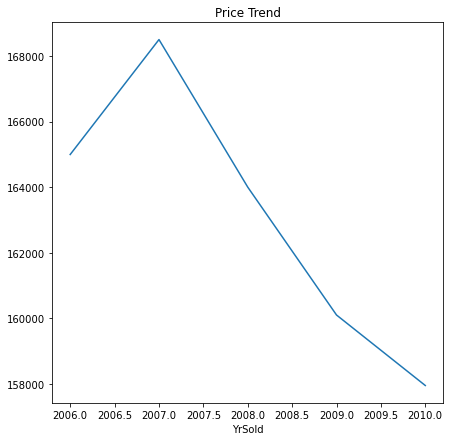

In [413]:
plt.figure(figsize=(7,7))
housedf.groupby('YrSold').median()['SalePrice'].plot()
plt.title('Price Trend')

From the graph above, it is observed that Sales value peaked between 2006 and 2007 and there has been a general downward trend in sales price since then

Text(0.5, 1.0, 'Price Trend')

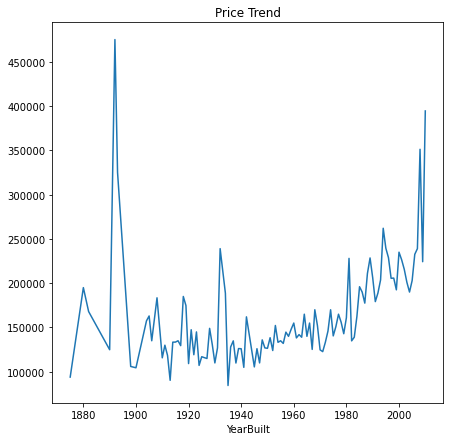

In [414]:
plt.figure(figsize=(7,7))
housedf.groupby('YearBuilt').median()['SalePrice'].plot()
plt.title('Price Trend')

From the graph above, it is observed that Sales value is higher for houses built after 1990s implying the lesser the age of the house, the higher its value, however houses built between 1880 and 1900 sold for the highest, this could be because of their antiquity value.

Text(0.5, 1.0, 'Price Trend')

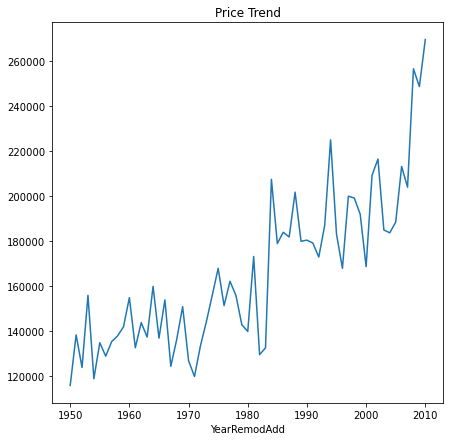

In [415]:
plt.figure(figsize=(7,7))
housedf.groupby('YearRemodAdd').median()['SalePrice'].plot()
plt.title('Price Trend')

From the graph above, it is observed that Sales value is higher for houses which were remodelled more recently.

Text(0.5, 1.0, 'Price Trend')

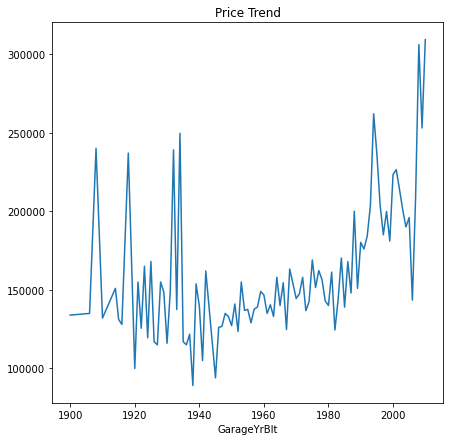

In [416]:
plt.figure(figsize=(7,7))
housedf.groupby('GarageYrBlt').median()['SalePrice'].plot()
plt.title('Price Trend')

From the graph above, it is observed that Sales value is higher for houses whose Garage was built more recently.

#### Extracting the age of House from YearBuilt will give a better insight into its relationship with target column data.

In [417]:
housedf['House_Age'] = housedf['YearBuilt'].apply(lambda y: 2021 - y) 

#### Extracting the age of Remodeled  House from YearRemodAdd will give a better insight into its relationship with target column data.

In [418]:
housedf['Remod_Age'] = housedf['YearRemodAdd'].apply(lambda y: 2021 - y) 

#### Extracting the age of Garage of the House from GarageYrBlt will give a better insight into its relationship with target column data.

In [419]:
housedf['Garage_age'] = housedf['GarageYrBlt'].apply(lambda y: 2021 - y) 

In [420]:
housedf.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True) #dropping the 'YearBuilt','YearRemodAdd','GarageYrBlt' columns since they are no longer needed

In [421]:
housedf_test['House_Age'] = housedf_test['YearBuilt'].apply(lambda y: 2021 - y) 
housedf_test['Remod_Age'] = housedf_test['YearRemodAdd'].apply(lambda y: 2021 - y) 
housedf_test['Garage_age'] = housedf_test['GarageYrBlt'].apply(lambda y: 2021 - y) 
housedf_test.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace = True) #dropping the 'YearBuilt','YearRemodAdd','GarageYrBlt' columns since they are no longer needed

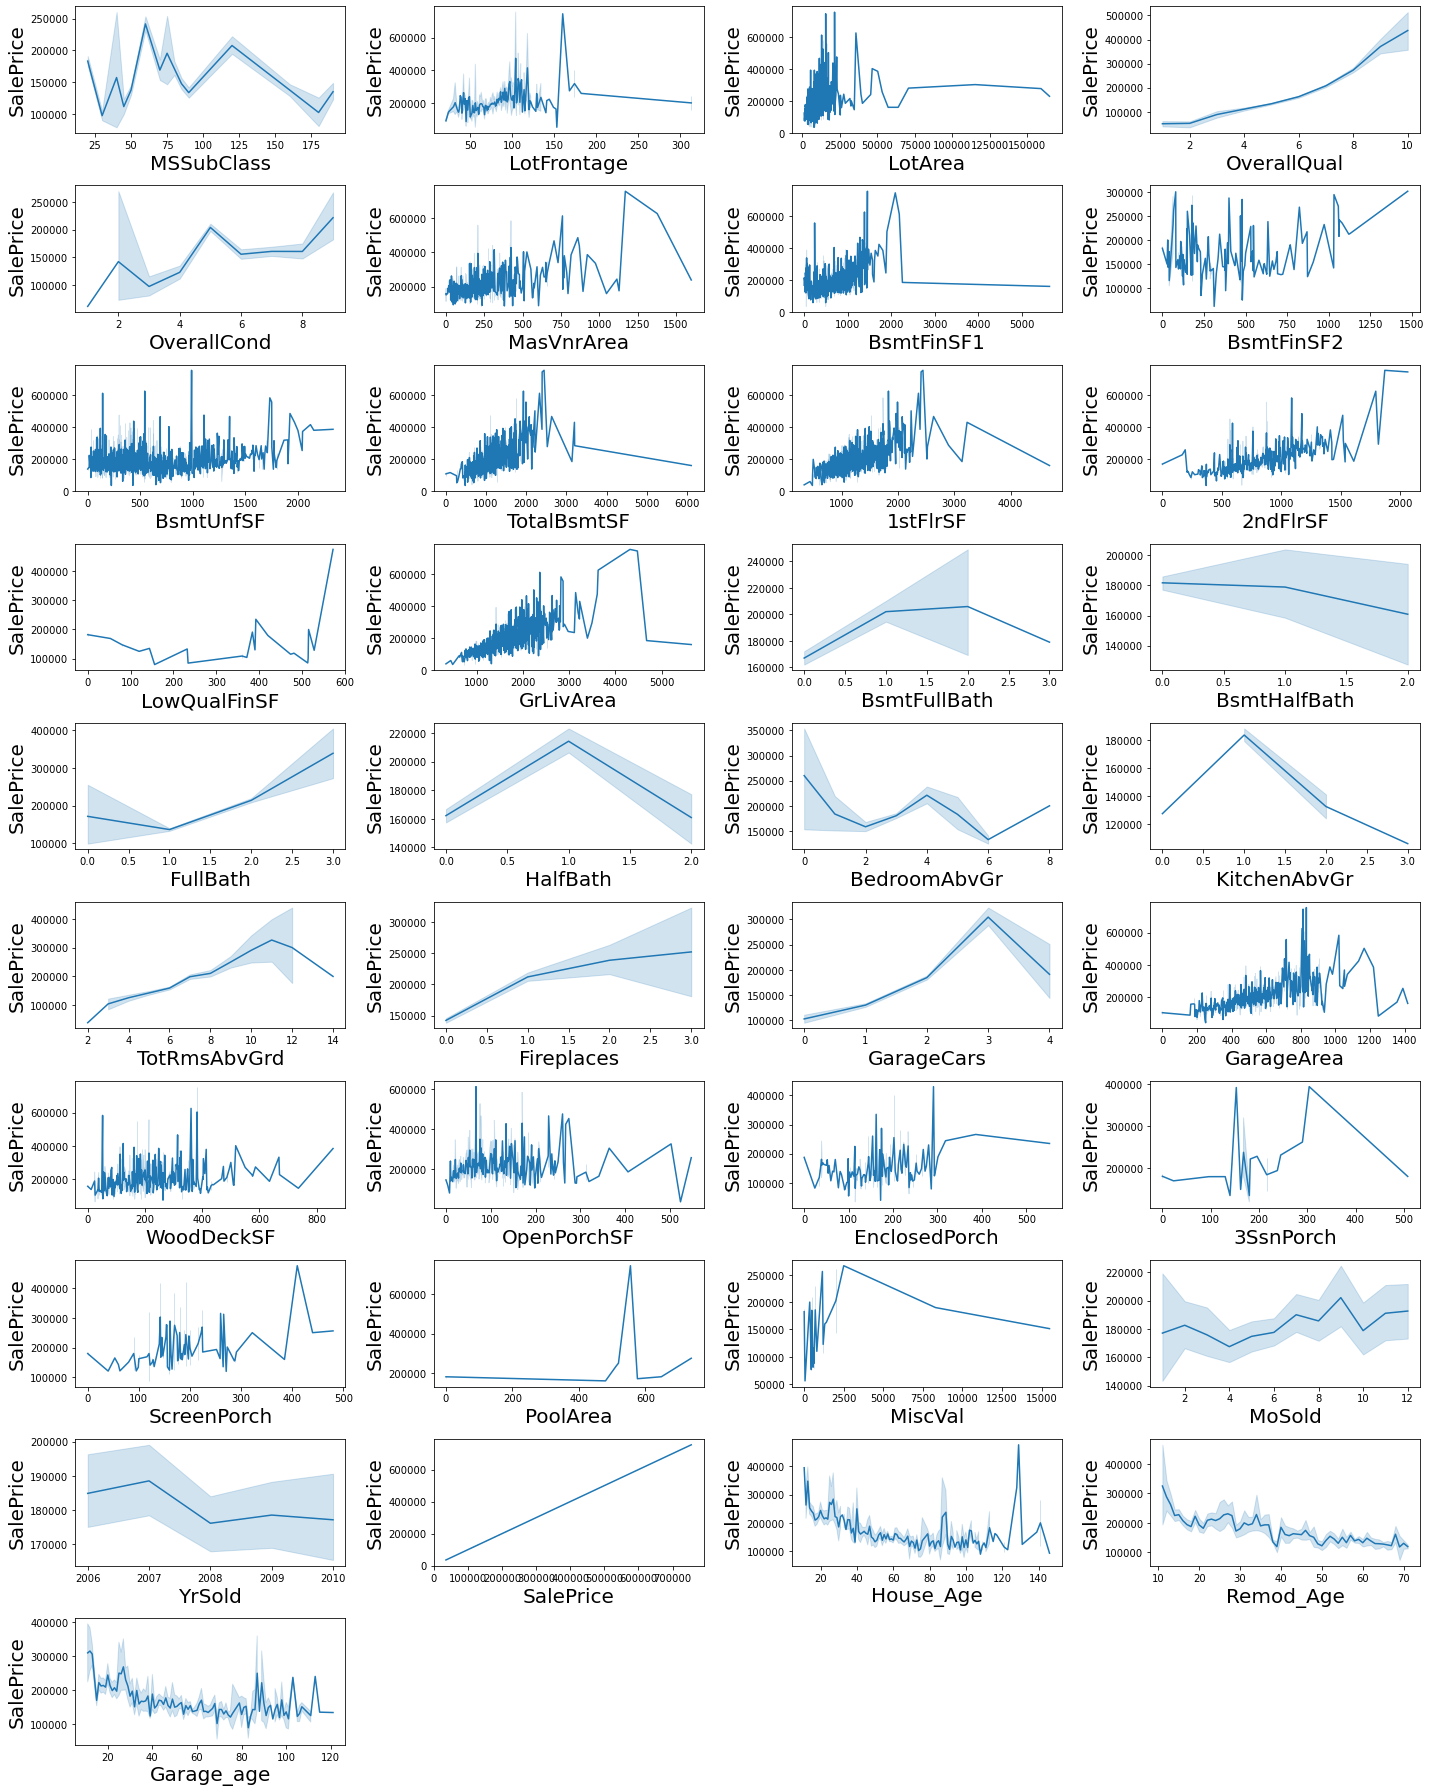

In [422]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = housedf['SalePrice']
housedf.drop(columns=['SalePrice'])
for col in housedf[housedf.columns[housedf.dtypes != 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.lineplot(housedf[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following Observations are made from graphs above:

    1 story and 2 and 2.5 story houses built in 1946 and newer fetch the highest amount in sales.
    
    Houses with LotFrontage between 100 ft and 200 ft are sold for the highest amount.
    
    Houses wtih Lot area upto 25000 sqft fetch the highest amount.
    
    There is a Linear positive relation between Overall Quality and SalesPrice
    
    There is a Linear positive relation between Overall Condition and SalesPrice
    
    There is a Linear positive relation between Masonry veneer area and SalesPrice
    
    Most Sales were done for Type 1 Finished basement with area upto 2500 sqft
    
    There is a Linear positive relation between Type 2 Finished basement area and SalesPrice
    
    There is a Linear positive relation between Total Basement area and SalesPrice
    
    There is a Linear positive relation between Total 1st area and 2nd floor area and SalesPrice
    
    There is a Linear positive relation between low Quality finished square feet and SalesPrice
    
    There is a Linear positive relation between Above grade living area square feet and SalesPrice
    
    There is a Linear negative relation between basment half bath and SalesPrice
    
    There is a Linear positive relation between Full Bathroom and SalesPrice
    
    There is a Linear positive relation between Total rooms above grade and SalesPrice
    
    There is a Linear positive relation between Fireplaces and SalesPrice
    
    There is a Linear positive relation between Garage Car capacity and SalesPrice
    
    There is a Linear positive relation between Garage area and SalesPrice
    
    Sales Prices peaked between 0-400 square feet area for Wooden Deck
    
    Sales Prices peaked between 0-300 square feet area for Open Porch
    
    Sales Price and Enclosed Porch area have a positive relation
    
    Sales Price and 3 season Porch area have a positive relation
    
    Sales Price and screen Porch area have a positive relation
    
    Sales Price and Month Sold have a positive relation
    
    Sales Price and Month Sold have a positive relation
    
    Sales Price and house age have a negative relation
    
    Sales Price and remodelling age have a negative relation
    
    Sales Price and Garage age have a negative relation

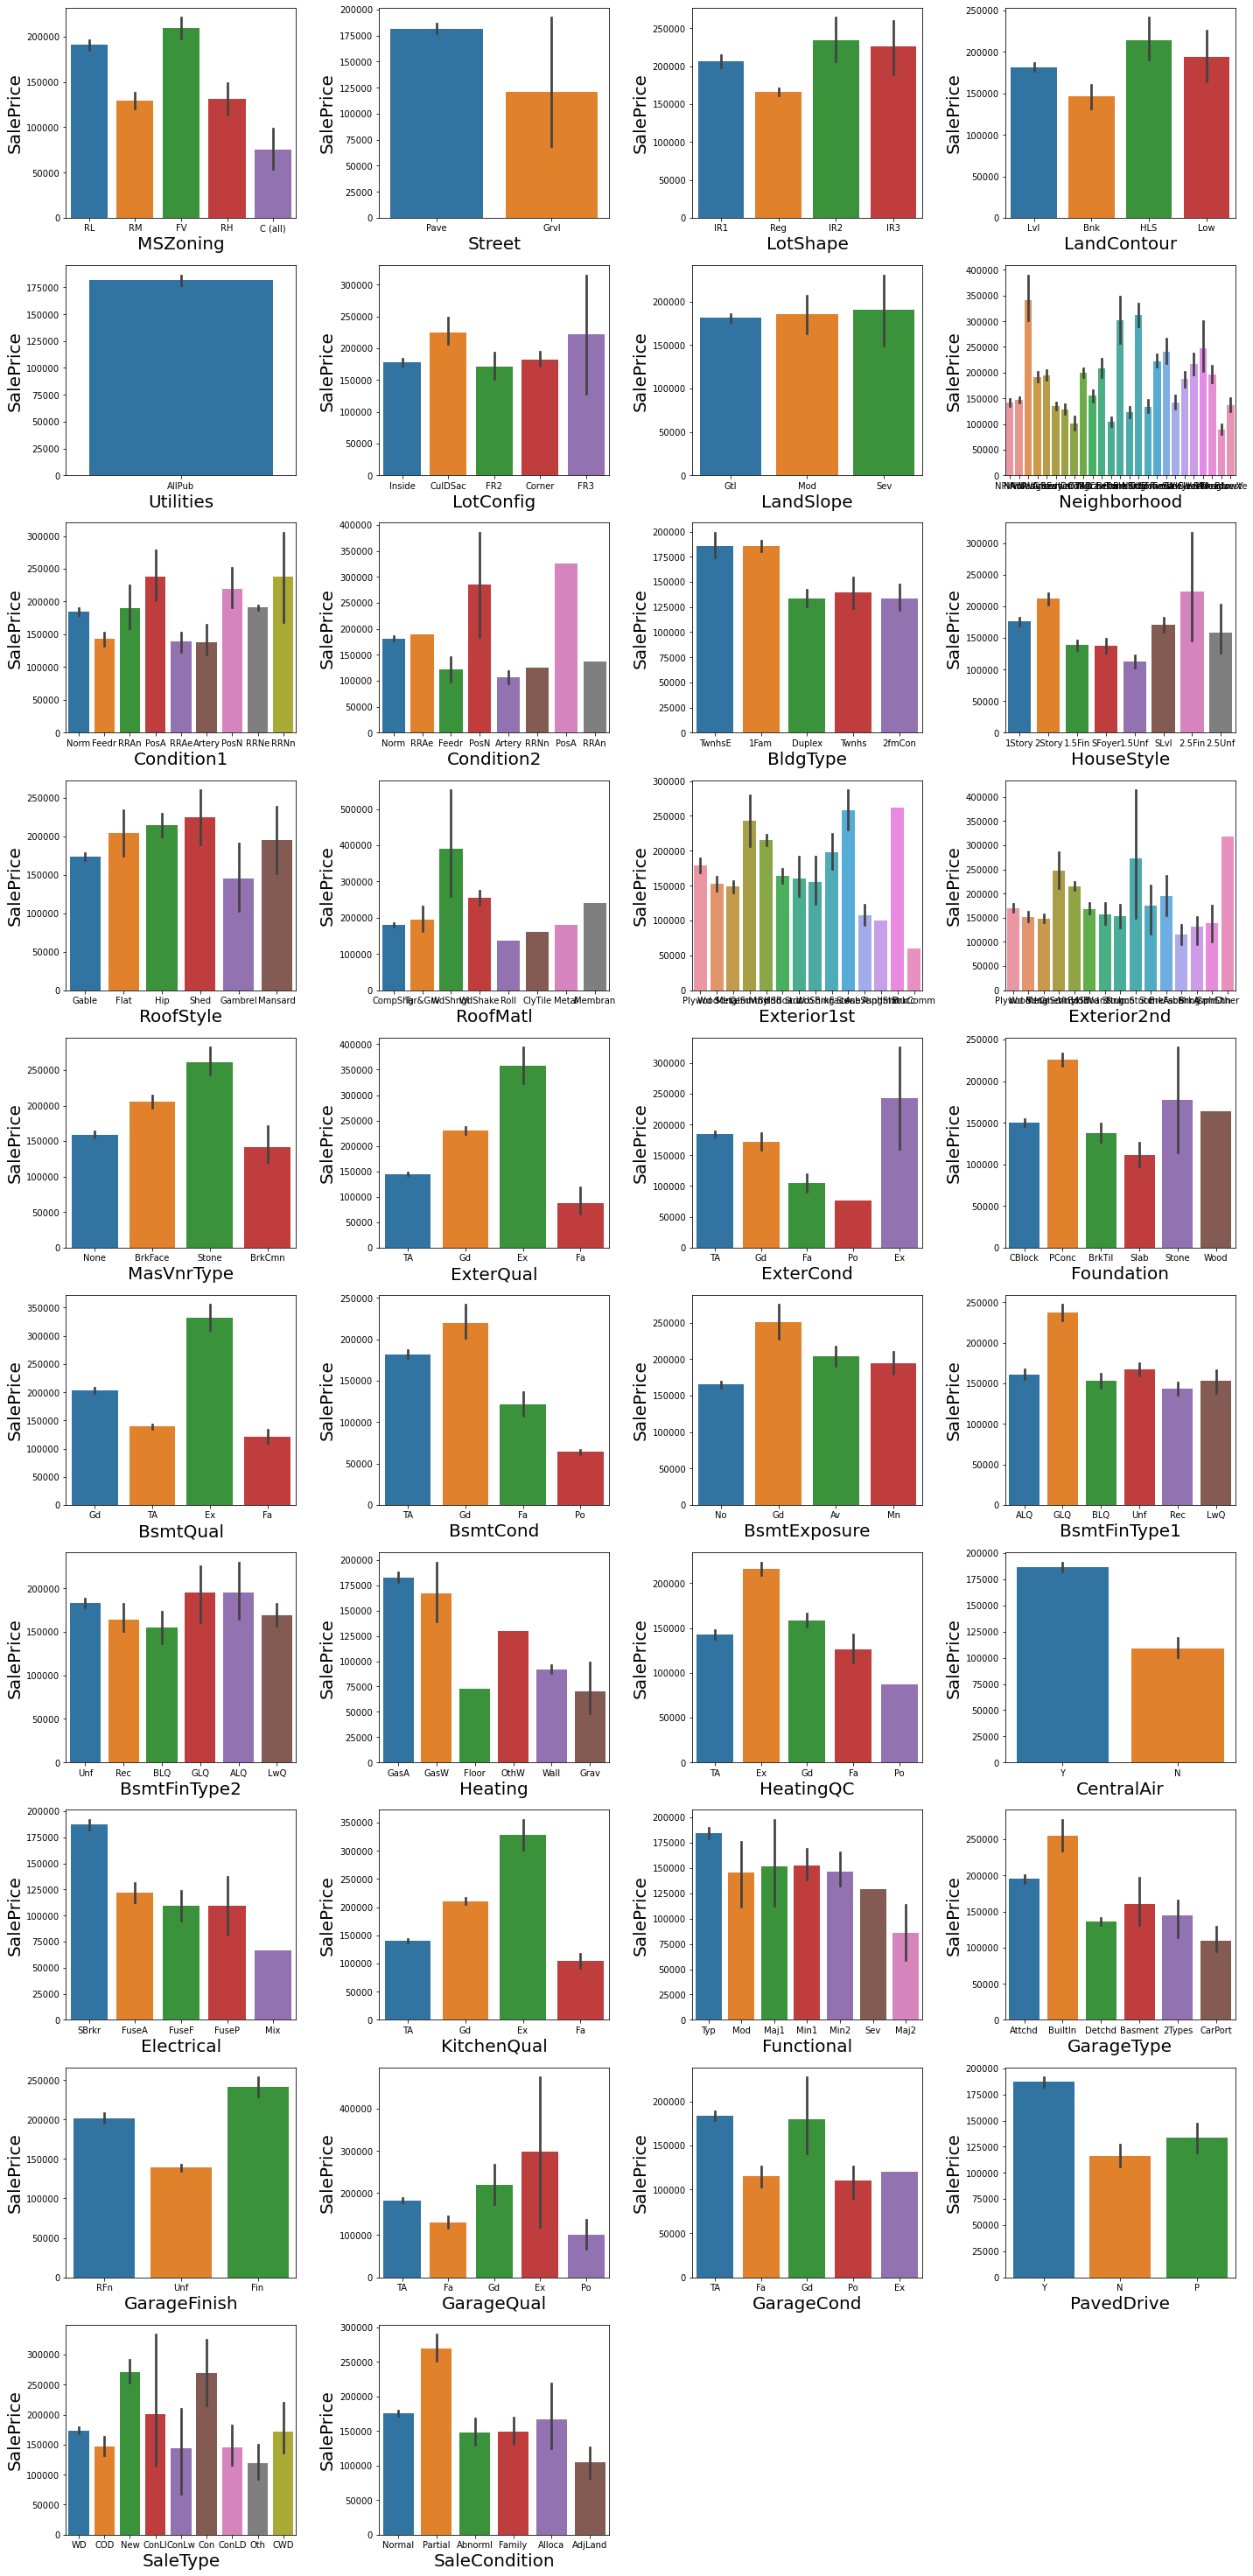

In [423]:
plt.figure(figsize=(20,41),facecolor='white')
plotnum=1
y = housedf['SalePrice']
for col in housedf[housedf.columns[housedf.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.barplot(housedf[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

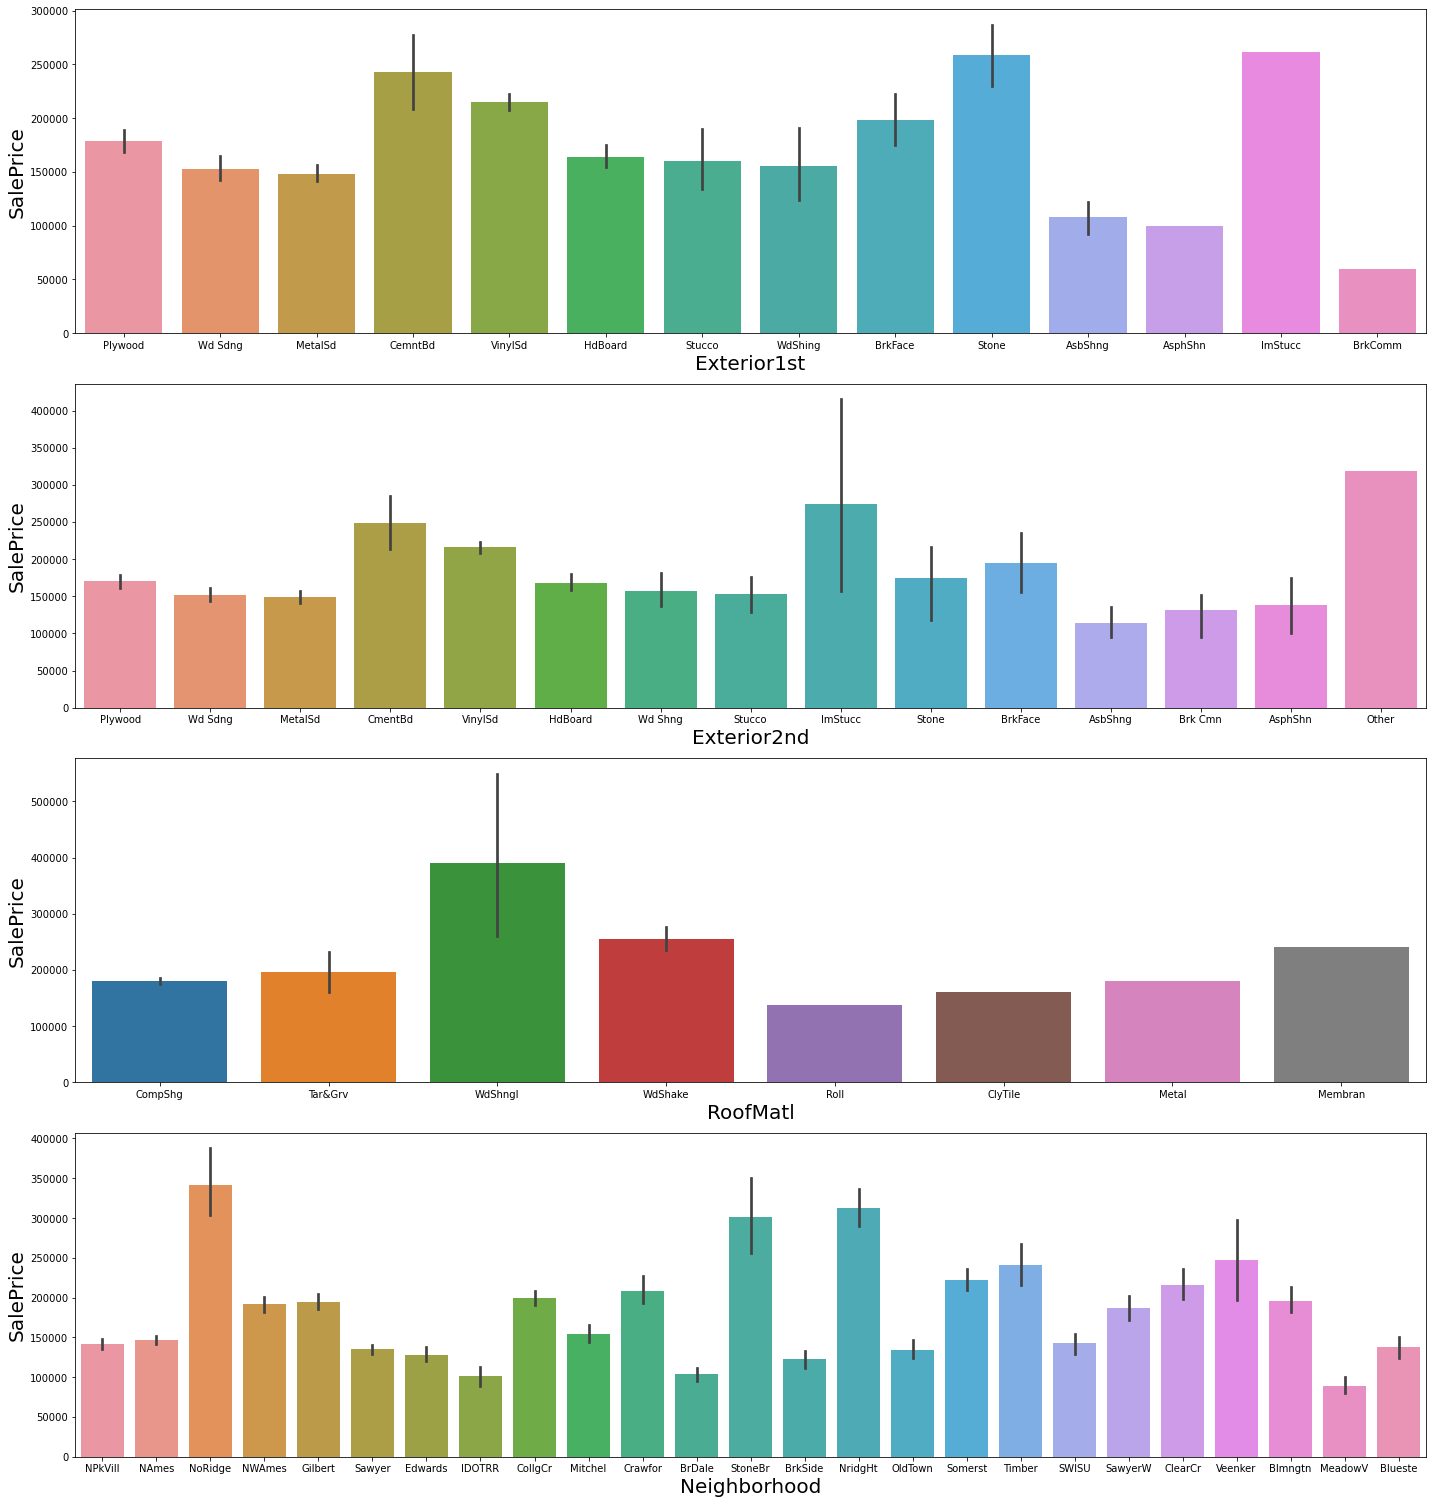

In [424]:
plt.figure(figsize=(20,21),facecolor='white')
plotnum=1
y = housedf['SalePrice']
for col in housedf[['Exterior1st','Exterior2nd','RoofMatl','Neighborhood']]:
    if plotnum<=4:
        plt.subplot(4,1,plotnum)
        sns.barplot(housedf[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following Observations are made from graphs above:
    
    Saleprice is highest for Floating Village and Low density Residential zones
    
    Saleprice is highest for housing properties near paved streets
    
    Saleprice is highest for irregular lot shapes
    
    Hill side properties sell for the highest amount
    
    Utilities and Landslope columns don't show a strong relationship with Sales Price
    
    Housing Properties in Northridge, Stone Brook,Northridge Heights,Timberland, Somerset,Veenker fetch the highest Sales amount
    
    Cul-de-sac and 3 sided frontage lot configurations fetch the highest Sales amount
    
    Proximity to Railroads, Off-site features like parks etc fetch the highest Sales amount
    
    Townhouse and Single-family Detached are the most valued
    
    Two story and Two and one-half story: 2nd level finished sell for the highest amount
        
    Houses with Wood Shingle Roofs sell for the highest amount
    
    Houses with Exterior covering of Cement Board,Stone,Imitation Stucco sell for the highest amount
    
    Houses with Stone Mason veneer type sell for the highest amount
    
    Houses with Excellent exterior material quality sell for the highest amount
    
    Houses with Excellent exterior material condition  sell for the highest amount
        
    Houses with Poured Contrete and stone foundation types sell for the highest amount
    
    Houses with Excellent (100+ inches) height of the basement sell for the highest amount
    
    Houses with Excellent Basement Condition sell for the highest amount
    
    Houses with Good  Basement Exposure sell for the highest amount
        
    Houses with Good and Average Living Quarters in Basement sell for the highest amount
    
    Houses with Gas forced warm air furnace and Gas hot water heating systems sell for the highest amount
    
    Houses with Excellent Heating quality and condition sell for the highest amount
    
    Houses with Central Air Conditioning sell for the highest amount
    
    Houses with Standard Circuit Breakers & Romex sell for the highest amount
    
    Houses with Excellent Kitchen Quality sell for the highest amount
    
    Houses with Built in Garages sell for the highest amount
    
    Houses with Good / Typical Garage condition sell for the highest amount
    
    Houses with Finished Garage sell for the highest amount
    
    Houses with excellent Garage Quality sell for the highest amount
    
    Houses with Paved Driveway sell for the highest amount 
    
    Homes just constructed and sold, Contract 15% Down payment regular terms sell for the highest amount 
    
    New Homes(not completed when last assessed) sell for the highest amount 

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

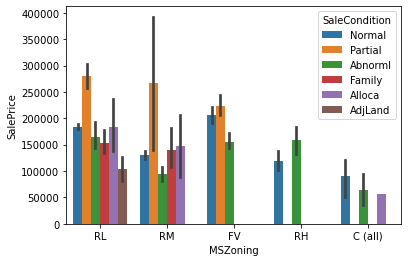

In [425]:
sns.barplot(housedf['MSZoning'],housedf['SalePrice'],hue = housedf['SaleCondition'])

New Homes are the most popular in all types of zoning

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

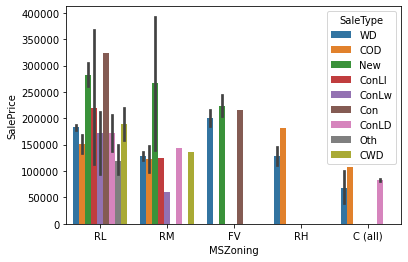

In [426]:
sns.barplot(housedf['MSZoning'],housedf['SalePrice'],hue = housedf['SaleType'])

New hourses and Low interest contract are the most popular sale types in low density, medium density and floating village residentials

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

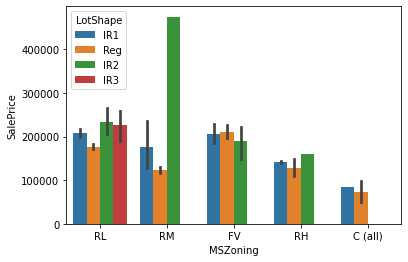

In [427]:
sns.barplot(housedf['MSZoning'],housedf['SalePrice'],hue = housedf['LotShape'])

Partially irregular and irregular plot shapes are most popular in low and medium residential zones

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

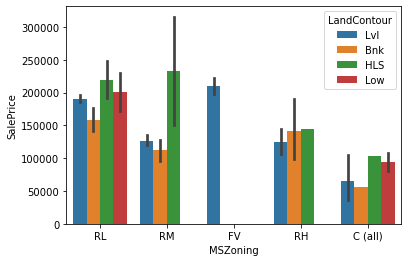

In [428]:
sns.barplot(housedf['MSZoning'],housedf['SalePrice'],hue = housedf['LandContour'])

Low density and medium density zones settled near hillsides and depressions are mostly sold at higher prices, whereas floating villages are settled in flat regions, and high density zones settle near banked regions sell for the highest prices

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

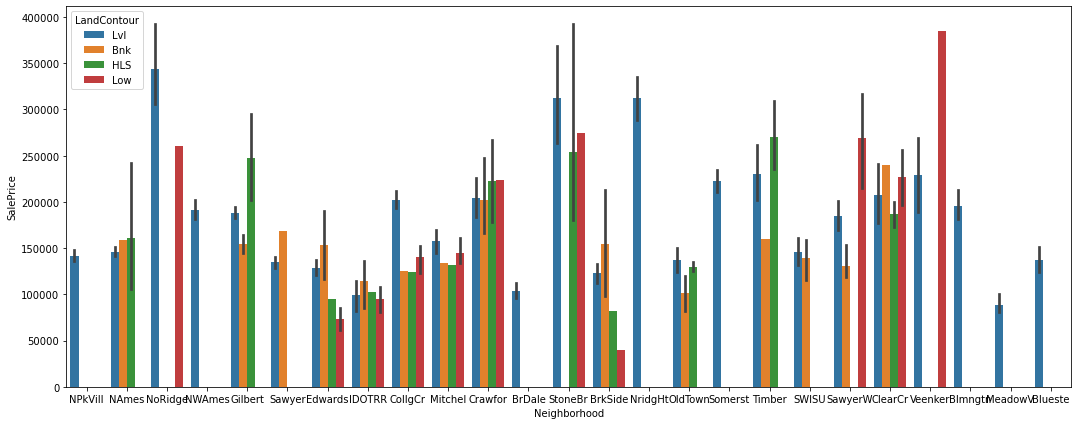

In [429]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(housedf['Neighborhood'],housedf['SalePrice'],hue = housedf['LandContour'])

Most housing properties established in levelled regions in North Ridge sell for the highest.

Most Housing properties in levelled regions of Stone Brook sell for highest followed by banked region and hillsides. 

Houses in levelled region of NorthRidge heights sell for the most while housing properties in depressed regions of Veenker sell for the highest prices. 

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

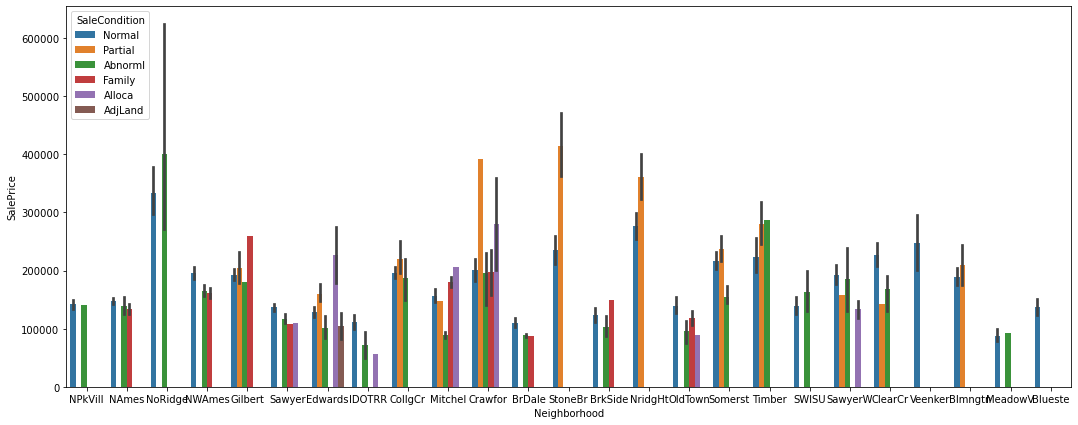

In [430]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(housedf['Neighborhood'],housedf['SalePrice'],hue = housedf['SaleCondition'])

Most housing properties that are newly established in Crawford,Stone Brook, Timberlane,North Ridge Heights,Bloomington Heights sell for the highest.

Most Housing properties in North Ridge sell for trade, foreclosure, short sale and normal sale in North Ridge.


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

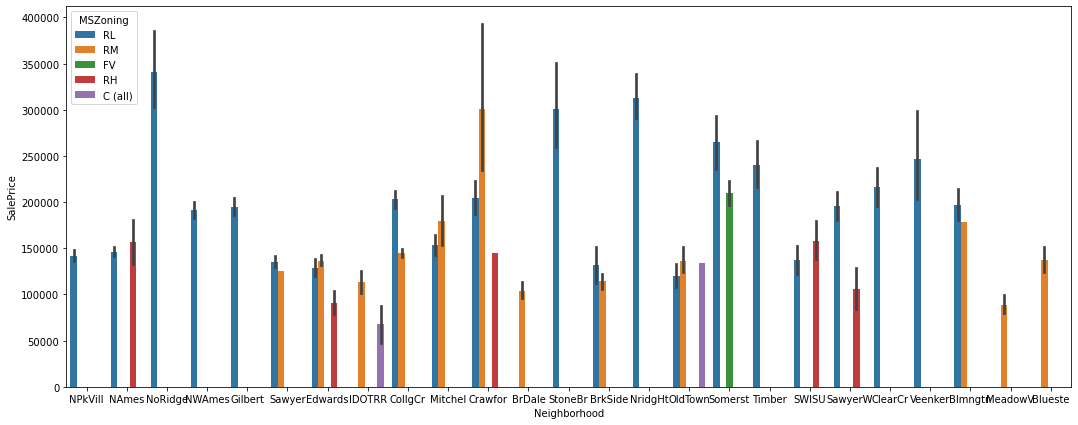

In [431]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(housedf['Neighborhood'],housedf['SalePrice'],hue =housedf['MSZoning'])

Most houses sold in North Ridge,North Ridge Heights, Somerset,TimberLane,Veenker, Bloomington Heights are in low density residential zones.

North Ames has more houses sold in High density residential zones, while Crawford has more houses sold in medium density residential zones.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

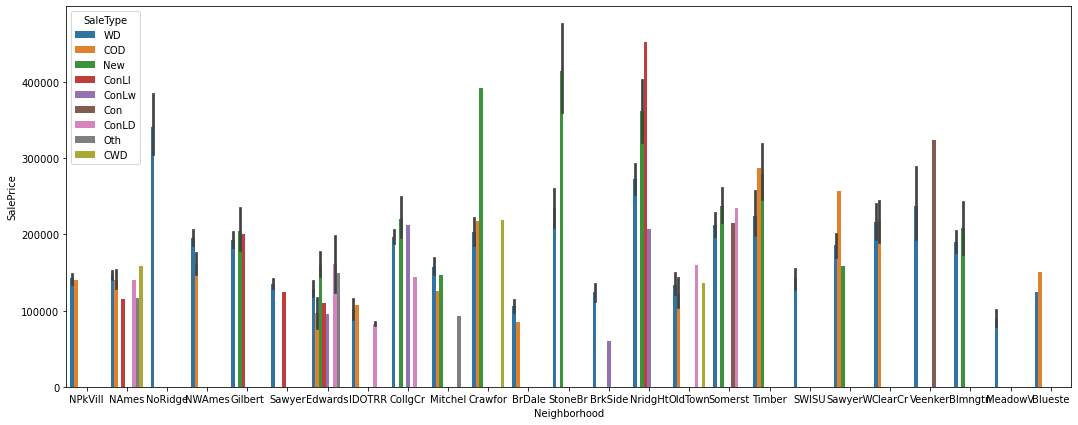

In [432]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(housedf['Neighborhood'],housedf['SalePrice'],hue = housedf['SaleType'])

Warranty Deed - Conventional,Home just constructed and sold,Contract Low InterestCourt Officer Deed/Estate are the most common sale types.

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

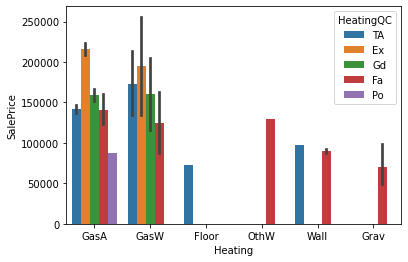

In [433]:
sns.barplot(housedf['Heating'],housedf['SalePrice'],hue = housedf['HeatingQC'])

Excelent quality of Gas forced warm air furnace and Gas hot water heating systems fetches the highest amount of money.

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

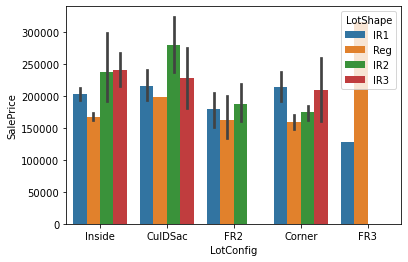

In [434]:
sns.barplot(housedf['LotConfig'],housedf['SalePrice'],hue = housedf['LotShape'])

3 sided Frontage properties with Regular plot shape sell for the highest

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

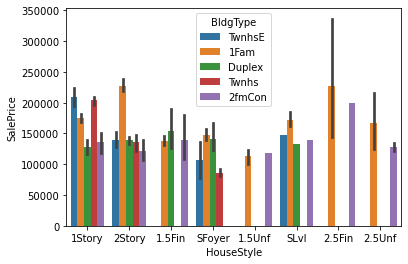

In [435]:
sns.barplot(housedf['HouseStyle'],housedf['SalePrice'],hue = housedf['BldgType'])

Two and one-half story: 2nd level finished housing properties sell for the highest.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

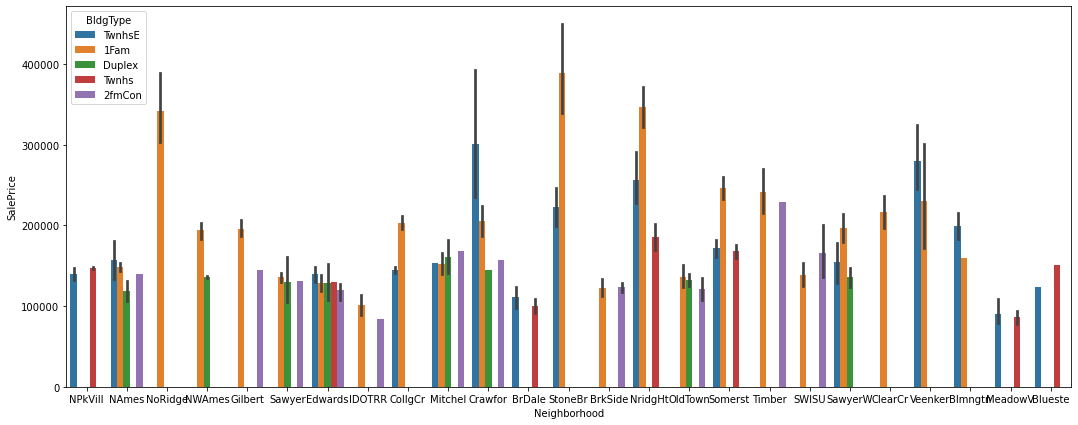

In [436]:
plt.figure(figsize=(18,7),facecolor='white')
sns.barplot(housedf['Neighborhood'],housedf['SalePrice'],hue = housedf['BldgType'])

Single-family Detached housing properties sell for the highest in most neighborhoods

### Encoding Categorical Columns

####  Encoding using Label Encoder

In [437]:
from sklearn.preprocessing import LabelEncoder

In [438]:
labenc = LabelEncoder()

In [439]:
for col in housedf[housedf.columns[housedf.dtypes == 'object']]:
    housedf[col] = labenc.fit_transform(housedf[col])

In [440]:
housedf['YrSold'] = housedf.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column

In [441]:
housedf['Utilities'] =housedf.Utilities.map({0:1})

In [442]:
housedf.dtypes[housedf.dtypes != 'object']

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int64
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64


In [443]:
from sklearn.preprocessing import LabelEncoder

In [444]:
labenc = LabelEncoder()

In [445]:
for col in housedf_test[housedf_test.columns[housedf_test.dtypes == 'object']]:
    housedf_test[col] = labenc.fit_transform(housedf_test[col])

In [446]:
housedf_test['YrSold'] = housedf_test.YrSold.map({2007:2,2009:4,2006:1, 2008: 3, 2010: 5}) # encoding years in YrSold Column

In [447]:
housedf_test['Utilities'] =housedf_test.Utilities.map({0:1})

In [448]:
housedf_test.dtypes[housedf_test.dtypes != 'object']

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities        float64
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64


### Finding Correlation between Feature and Target columns

In [449]:
h_corr =housedf.corr()

In [450]:
h_corr

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336681 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069661 -0.023328  0.140215   
LotFrontage     -0.336681 -0.069661     1.000000  0.299452 -0.035309   
LotArea         -0.124151 -0.023328     0.299452  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035309 -0.263973  1.000000   
LotShape         0.104485  0.053655    -0.144523 -0.189201 -0.012941   
LandContour     -0.021387  0.001175    -0.073451 -0.159038  0.105226   
Utilities             NaN       NaN          NaN       NaN       NaN   
LotConfig        0.076880 -0.027246    -0.192468 -0.152063  0.000153   
LandSlope       -0.014930 -0.023952     0.046051  0.395410 -0.141572   
Neighborhood     0.013918 -0.251833     0.065824  0.010707  0.001420   
Condition1      -0.042474 -0.025651    -0.025581  0.029520  0.002189   
Condition2      -0.044319  0.031959     0.011761  0.040096  0.001406   
BldgType         0.731815 -0.024776    -0.403220 -0.215345 -0.013606   
HouseStyle       0.381585 -0.110991     0.056321 -0.040637  0.016793   
OverallQual      0.070462 -0.134037     0.229218  0.107188  0.057140   
OverallCond     -0.056978  0.189553    -0.047573  0.017513  0.031082   
RoofStyle       -0.100641  0.000913     0.146222  0.038615 -0.006875   
RoofMatl        -0.032214  0.009719     0.082566  0.194142  0.007889   
Exterior1st     -0.090178 -0.012037     0.087727  0.048265  0.012482   
Exterior2nd     -0.120022  0.005548     0.110762  0.027328  0.014618   
MasVnrType      -0.013252 -0.033521    -0.034388 -0.005204  0.000822   
MasVnrArea       0.028215 -0.059170     0.188108  0.120192  0.024363   
ExterQual       -0.024133  0.184815    -0.169835 -0.057865  0.044509   
ExterCond        0.004186 -0.099269     0.044582  0.011438  0.017738   
Foundation       0.053951 -0.244844     0.090734 -0.021195  0.032701   
BsmtQual        -0.052242  0.123822    -0.176402 -0.075262 -0.031959   
BsmtCond        -0.013220  0.002336     0.043165  0.010165 -0.017190   
BsmtExposure    -0.068192  0.037414    -0.123896 -0.136900  0.065253   
BsmtFinType1     0.017515  0.021518    -0.031507 -0.053584 -0.006420   
BsmtFinSF1      -0.052236 -0.034161     0.228996  0.221851 -0.009066   
BsmtFinType2     0.040573 -0.031322    -0.007509 -0.084713  0.045208   
BsmtFinSF2      -0.062403  0.027055     0.002159  0.056656  0.003550   
BsmtUnfSF       -0.134170 -0.032638     0.113924  0.006600  0.024205   
TotalBsmtSF     -0.214042 -0.058896     0.356107  0.259733  0.016422   
Heating          0.047734  0.051188    -0.026622 -0.020394  0.006981   
HeatingQC       -0.001994  0.119852    -0.078262 -0.003337 -0.047968   
CentralAir      -0.113883 -0.015887     0.077404  0.051182  0.043024   
Electrical       0.045533 -0.079205     0.066868  0.050388  0.038720   
1stFlrSF        -0.227927 -0.033095     0.403436  0.312843  0.011486   
2ndFlrSF         0.300366 -0.048968     0.089675  0.059803  0.040957   
LowQualFinSF     0.053737  0.012098     0.007506 -0.001915  0.007352   
GrLivArea        0.086448 -0.064125     0.374251  0.281360  0.043322   
BsmtFullBath     0.004556 -0.007287     0.094046  0.142387 -0.036483   
BsmtHalfBath     0.008207  0.006345     0.001389  0.059282  0.013788   
FullBath         0.140807 -0.188837     0.171773  0.123197  0.033208   
HalfBath         0.168423 -0.121209     0.047816  0.007271  0.045146   
BedroomAbvGr    -0.013283 -0.001906     0.237199  0.117351  0.027587   
KitchenAbvGr     0.283506  0.026744    -0.002729 -0.013075  0.012304   
KitchenQual     -0.011378  0.111689    -0.174713 -0.064278 -0.012056   
TotRmsAbvGrd     0.051179 -0.031062     0.318771  0.184546  0.038259   
Functional       0.022913 -0.091684     0.039272 -0.033165 -0.015309   
Fireplaces      -0.035792  0.010658     0.230610  0.285983  0.010574   
GarageType       0.077469  0.125155    -0.216237 -0.123746 -0.000824   
GarageFinish    -0.000067  0.162566    -0.192961 -0.117

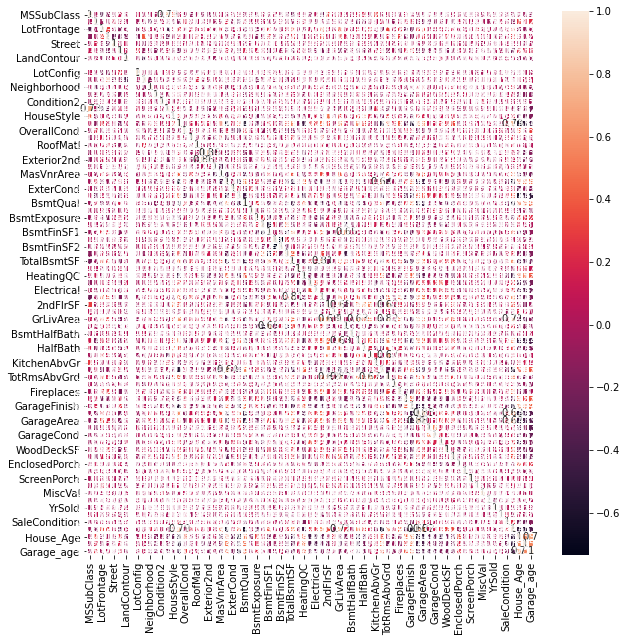

In [451]:
plt.figure(figsize=(10,10))
sns.heatmap(h_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

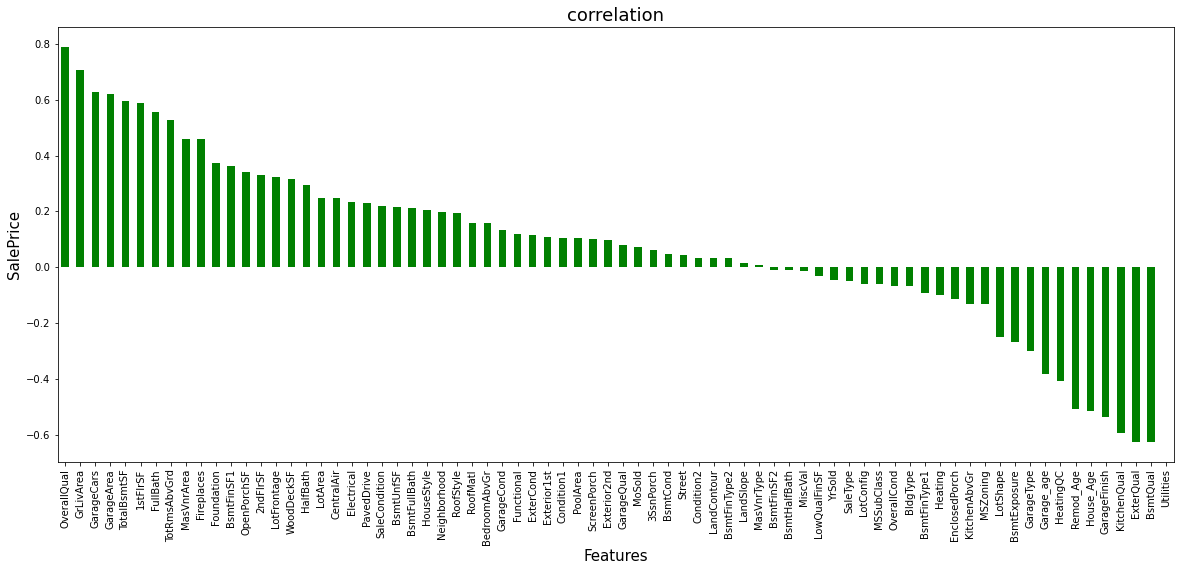

In [452]:
plt.figure(figsize = (20,8))
housedf.corr()['SalePrice'].sort_values(ascending = False).drop(['SalePrice']).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15)
plt.ylabel('SalePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

OverallQual,GrLiveArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MasVnrArea,FirePlaces have the strongest positive correlation with SalePrice while BsmtQual,ExterQual,KitchenQual,GarageFinish,House_age,Remod_age,HeatingQC,Garage_age have the strongest negative correlation with SalePrice.

#### Dropping column 'Utilities' since it doesn't contribute to building a good model for predicting the target variable values.

In [453]:
housedf.drop(columns = ['Utilities'],inplace=True)

In [454]:
housedf_test.drop(columns = ['Utilities'],inplace=True)

### Removing Outliers in continuous data type columns using Z score Method

In [455]:
df2 =housedf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']].copy() #making a copy of the continuous data type columns with outliers.

In [456]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [457]:
df3.shape

(1006, 14)

In [458]:
df2.shape

(1168, 14)

##### Data loss %:

In [459]:
loss=(1168-1006)/1168 * 100
loss

13.86986301369863

13.86% data loss is not acceptable therefore outliers will not be removed.

#### Normalizing Data Distribution using PowerTransformer

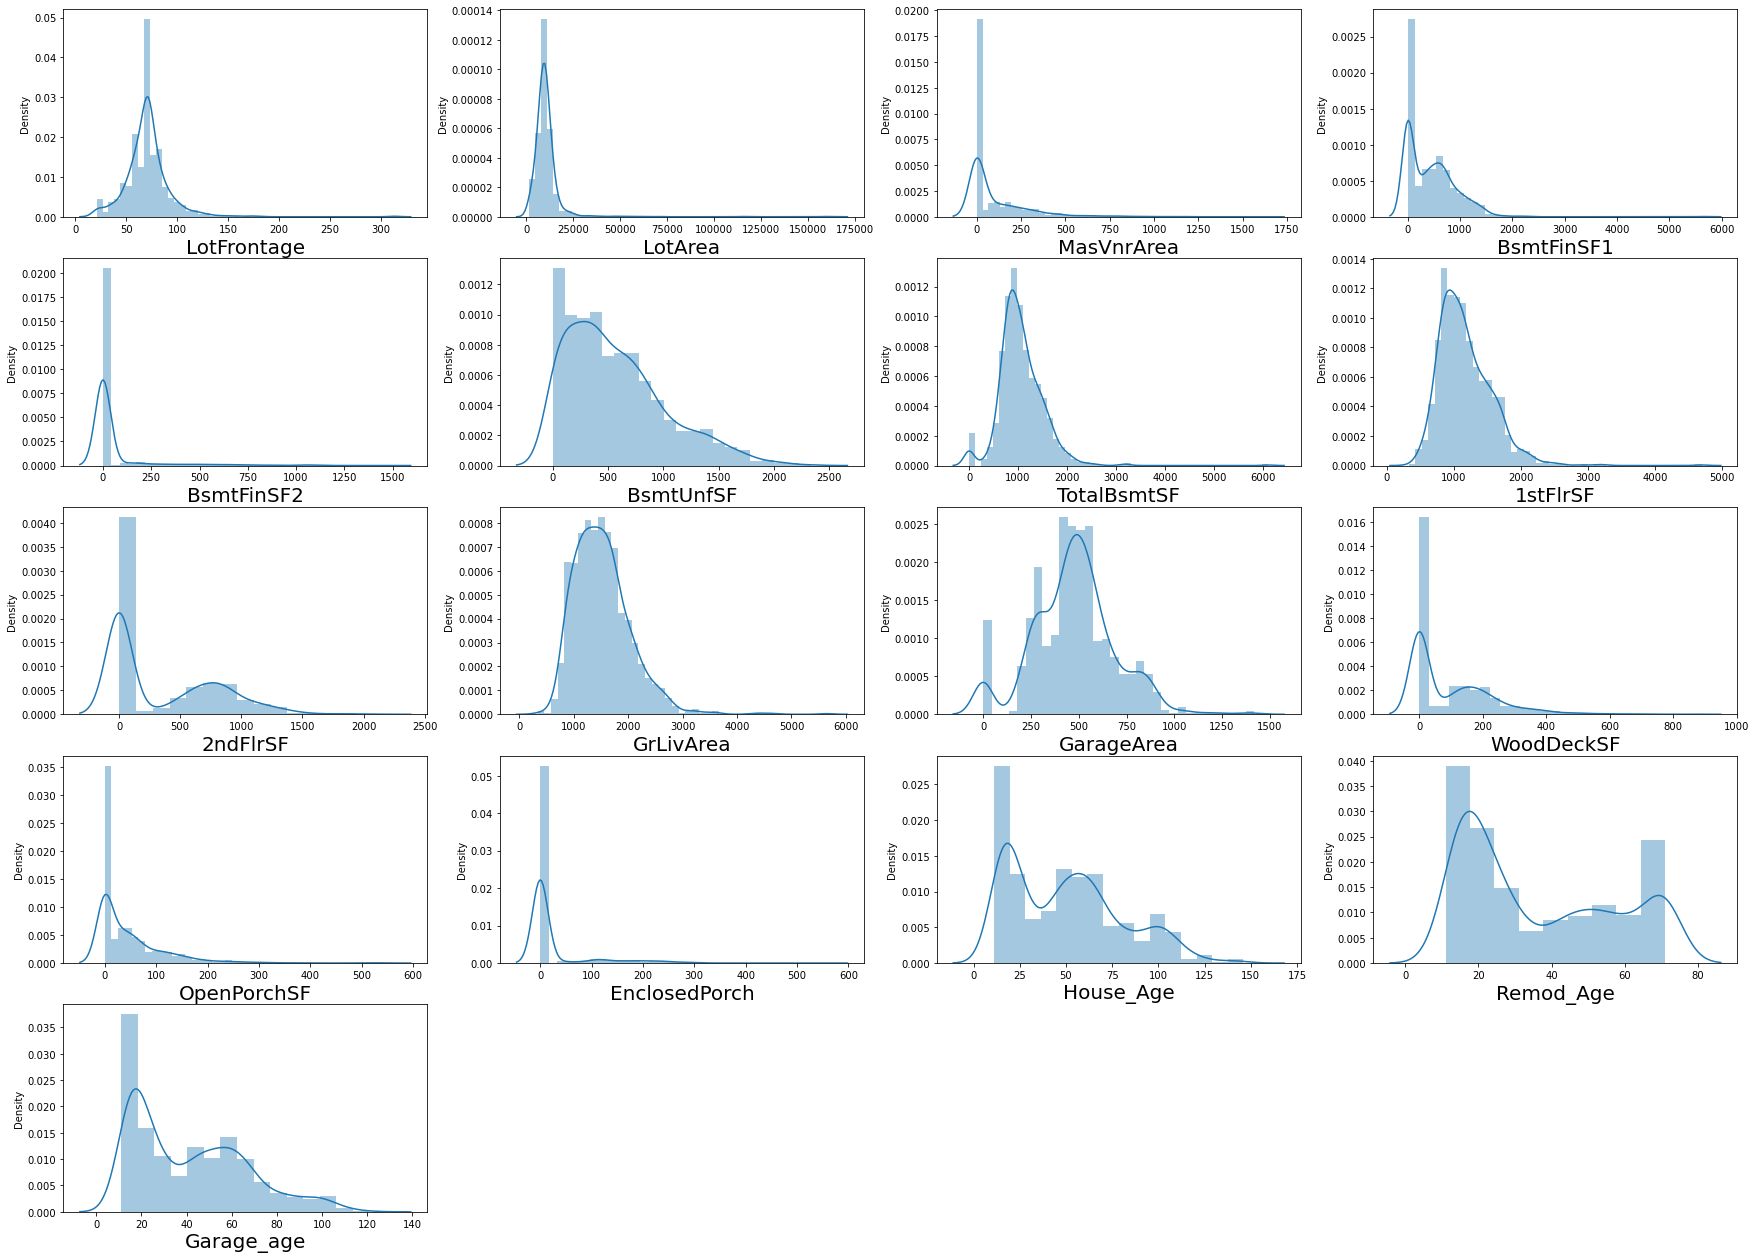

In [460]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in housedf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']]:
    if plotnum<=30:
        plt.subplot(10,4,plotnum)
        sns.distplot(housedf[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [461]:
housedf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage       2.710383
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
House_Age         0.579204
Remod_Age         0.495864
Garage_age        0.708074
dtype: float64

Data Distributions are skewed.

In [462]:
from sklearn.preprocessing import PowerTransformer

In [463]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [464]:
df4 = housedf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [465]:
transformed= powtrans.fit_transform(df4)

In [466]:
type(transformed)

numpy.ndarray

In [467]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [468]:
transformed.skew()

LotFrontage      0.161368
LotArea          0.032509
MasVnrArea       0.439526
BsmtFinSF1      -0.404528
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
GarageArea      -0.320370
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
EnclosedPorch    2.022616
dtype: float64

In [469]:
transformed.index = housedf.index

In [470]:
housedf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']] = transformed[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [471]:
housedf[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage      0.161368
LotArea          0.032509
MasVnrArea       0.439526
BsmtFinSF1      -0.404528
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
GarageArea      -0.320370
WoodDeckSF       0.113026
OpenPorchSF     -0.002749
EnclosedPorch    2.022616
House_Age        0.579204
Remod_Age        0.495864
Garage_age       0.708074
dtype: float64

A lot of skewness has been removed.

In [472]:
from sklearn.preprocessing import PowerTransformer

In [473]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [474]:
df4 = housedf_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [475]:
transformed= powtrans.fit_transform(df4)

In [476]:
type(transformed)

numpy.ndarray

In [477]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [478]:
transformed.skew()

LotFrontage      0.096846
LotArea          0.003111
MasVnrArea       0.376082
BsmtFinSF1      -0.441605
BsmtFinSF2       2.570199
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
1stFlrSF        -0.000548
2ndFlrSF         0.284246
GrLivArea       -0.000307
GarageArea      -0.361092
WoodDeckSF       0.210102
OpenPorchSF     -0.058951
EnclosedPorch    2.165535
dtype: float64

In [479]:
transformed.index = housedf_test.index

In [480]:
housedf_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']] = transformed[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']]

In [481]:
housedf_test[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','House_Age','Remod_Age','Garage_age']].skew()

LotFrontage      0.096846
LotArea          0.003111
MasVnrArea       0.376082
BsmtFinSF1      -0.441605
BsmtFinSF2       2.570199
BsmtUnfSF       -0.232099
TotalBsmtSF     -0.037982
1stFlrSF        -0.000548
2ndFlrSF         0.284246
GrLivArea       -0.000307
GarageArea      -0.361092
WoodDeckSF       0.210102
OpenPorchSF     -0.058951
EnclosedPorch    2.165535
House_Age        0.755233
Remod_Age        0.535600
Garage_age       0.742835
dtype: float64

### Feature Selection

In [482]:
from sklearn.preprocessing import StandardScaler

In [483]:
X = housedf.drop(columns = ['SalePrice'])
y = housedf['SalePrice']

In [484]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [485]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [486]:
vif = pd.DataFrame()

In [487]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [488]:
vif

Features        vif
0      MSSubClass   5.507317
1        MSZoning   1.382987
2     LotFrontage   2.174714
3         LotArea   2.900531
4          Street   1.131134
5        LotShape   1.294356
6     LandContour   1.329432
7       LotConfig   1.159877
8       LandSlope   1.481140
9    Neighborhood   1.279199
10     Condition1   1.159503
11     Condition2   1.122465
12       BldgType   5.184126
13     HouseStyle   2.467453
14    OverallQual   4.148229
15    OverallCond   1.959803
16      RoofStyle   1.299948
17       RoofMatl   1.203587
18    Exterior1st   4.362735
19    Exterior2nd   4.381901
20     MasVnrType   1.537917
21     MasVnrArea   1.973891
22      ExterQual   2.676707
23      ExterCond   1.220117
24     Foundation   2.130516
25       BsmtQual   2.321614
26       BsmtCond   1.192534
27   BsmtExposure   1.579126
28   BsmtFinType1   3.198546
29     BsmtFinSF1   6.770522
30   BsmtFinType2   4.019272
31     BsmtFinSF2   4.504940
32      BsmtUnfSF   5.323098
33    TotalBsmtSF   6.927810
34        Heating   1.317820
35      HeatingQC   1.696584
36     CentralAir   1.725971
37     Electrical   1.379424
38       1stFlrSF  17.623835
39       2ndFlrSF  17.357365
40   LowQualFinSF   1.532083
41      GrLivArea  28.469725
42   BsmtFullBath   2.322177
43   BsmtHalfBath   1.246433
44       FullBath   3.275114
45       HalfBath   2.467475
46   BedroomAbvGr   2.828754
47   KitchenAbvGr   1.855924
48    KitchenQual   2.068553
49   TotRmsAbvGrd   5.190507
50     Functional   1.253417
51     Fireplaces   1.720801
52     GarageType   1.792019
53   GarageFinish   2.089285
54     GarageCars   6.283705
55     GarageArea   6.196549
56     GarageQual   1.643079
57     GarageCond   1.576242
58     PavedDrive   1.541041
59     WoodDeckSF   1.360420
60    OpenPorchSF   1.612450
61  EnclosedPorch   1.419331
62      3SsnPorch   1.065638
63    ScreenPorch   1.160073
64       PoolArea   1.133082
65        MiscVal   1.087232
66         MoSold   1.089278
67         YrSold   1.101954
68       SaleType   1.121925
69  SaleCondition   1.199333
70      House_Age   8.061473
71      Remod_Age   2.933032
72     Garage_age   2.888644

BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars,GarageArea,House_Age exhibit high multicollinearity.

### Principle Component Analysis

In [489]:
from sklearn.decomposition import PCA

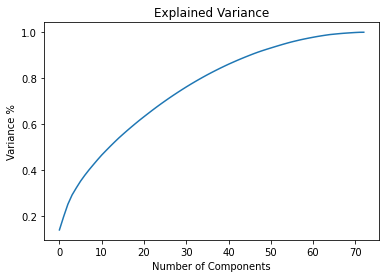

In [490]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

70 components explain around 95% variance in Data

### Selecting Kbest Features

In [491]:
from sklearn.feature_selection import SelectKBest, f_classif

In [492]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [493]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(75,'Score'))

          Feature     Score
14    OverallQual  5.303071
65        MiscVal  3.564855
22      ExterQual  3.514221
41      GrLivArea  2.956955
25       BsmtQual  2.876879
48    KitchenQual  2.617125
54     GarageCars  2.578547
44       FullBath  2.435854
55     GarageArea  2.242545
53   GarageFinish  2.187163
70      House_Age  2.133300
33    TotalBsmtSF  2.070692
38       1stFlrSF  2.060541
4          Street  1.835751
71      Remod_Age  1.813783
34        Heating  1.707885
49   TotRmsAbvGrd  1.656866
1        MSZoning  1.640044
60    OpenPorchSF  1.613273
51     Fireplaces  1.591973
36     CentralAir  1.557680
72     Garage_age  1.535466
24     Foundation  1.528516
5        LotShape  1.407526
3         LotArea  1.405080
29     BsmtFinSF1  1.385210
35      HeatingQC  1.358939
45       HalfBath  1.337597
9    Neighborhood  1.281079
21     MasVnrArea  1.259874
59     WoodDeckSF  1.246439
27   BsmtExposure  1.214154
2     LotFrontage  1.212723
26       BsmtCond  1.190161
17       RoofMatl  1

In [494]:
X.shape

(1168, 73)

#### Selecting best features based on their scores:

In [495]:
x_best = X.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()

In [496]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Regression Problem since Target/ Label column ('SalePrice') has Continuous type of Data.


## Regression Model Building

In [497]:
from sklearn.model_selection import train_test_split

In [498]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [499]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9134855009520283 on random_state: 72


In [500]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =72)

In [501]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR



In [502]:
from sklearn.metrics import r2_score,mean_squared_error

In [503]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [504]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

### Ridge Regression Model

In [505]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [506]:
r2_score(y_test,y_r_pred)

0.8581092139642148

#### Mean Squared Error 

In [507]:
mean_squared_error(y_test,y_r_pred)

860008390.6841215

#### Root Mean Squared Error

In [508]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

29325.899656858295

###  Random Forest Regression Model

In [509]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [510]:
r2_score(y_test,y_rf_pred)

0.9165437638647783

#### Mean Squared Error

In [511]:
mean_squared_error(y_test,y_rf_pred)

505833150.52680486

#### Root Mean Squared Error

In [512]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

22490.73477071847

### XGB Regression Model 

In [513]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [514]:
r2_score(y_test,y_xg_pred)

0.8990045700516924

#### Mean Squared Error

In [515]:
mean_squared_error(y_test,y_xg_pred)

612139234.7096407

#### Root Mean Squared Error

In [516]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

24741.447708443433

### Support Vector Regression Model

In [517]:
y_svr_pred = SV.predict(x_test)

####  R2 Score

In [518]:
r2_score(y_test,y_svr_pred)

-0.06166648000509145

#### Mean Squared Error

In [519]:
mean_squared_error(y_test,y_svr_pred)

6434822911.490414

#### Root Mean Squared Error

In [520]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

80217.34794600488

###  Decision Tree Regression Model

In [521]:
y_dt_pred = dt.predict(x_test)

####  R2 Score

In [522]:
r2_score(y_test,y_dt_pred)

0.7844941143909734

#### Mean Squared Error

In [523]:
mean_squared_error(y_test,y_dt_pred)

1306193834.3116438

#### Root Mean Squared Error

In [524]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

36141.30371626961

### Model Cross Validation

In [525]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [526]:
cross_val_score(r,scaled_x_best,y,cv=5).mean()

0.7724187374411112

#### Random Forest Regression

In [527]:
cross_val_score(rf,scaled_x_best,y,cv=5).mean()

0.8480890384584587

#### XGB Regression

In [528]:
cross_val_score(xg,scaled_x_best,y,cv=5).mean()

0.8317857020177609

#### SV Regression

In [529]:
cross_val_score(SV,scaled_x_best,y,cv=5).mean()

-0.061780972650984235

#### Decision Tree Regression

In [530]:
cross_val_score(dt,scaled_x_best,y,cv=5).mean()

0.7207977128740727

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

#### Random Forest Regressor

In [531]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[1,2,5,10,20,30],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [532]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [533]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 30],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [534]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}

In [535]:
Best_mod = RandomForestRegressor(n_estimators = 80,criterion = 'mae', max_depth= 40, max_features = 'sqrt',min_samples_leaf = 1, min_samples_split = 5)


In [536]:
Best_mod.fit(x_train,y_train)


RandomForestRegressor(criterion='mae', max_depth=40, max_features='sqrt',
                      min_samples_split=5, n_estimators=80)

In [537]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


90.83144702833954


##### Random Forest Regressor has an accuracy of 91.11%

#### Saving The Model

In [538]:
import joblib
joblib.dump(Best_mod,"BestModelPFA.pkl")

['BestModelPFA.pkl']

### Preparing the Test Dataset

In [540]:
xtest_best = housedf_test.drop(columns=['SaleType','Condition2','BsmtFinSF2']).copy()

In [541]:
scaled_xtest_best = scaler.fit_transform(xtest_best)

#### Loading The Model

In [542]:
mod=joblib.load("BestModelPFA.pkl")

In [543]:
print(mod.predict(scaled_xtest_best))

[335010.3625  196596.2625  259300.25    171133.7875  251139.825
 104974.9375  150700.79375 325700.89375 242294.88125 162159.99375
  90543.5375  152256.45625 128212.48125 182675.9     306799.375
 128501.8125  119231.675   127632.7     172896.60625 197881.1
 152721.05    154493.4375  148005.89375 104745.525   109660.4625
 133261.46875 182723.375   150314.5875  170652.5125  111359.73125
 134611.8125  191473.475   240705.3625  162796.4     119016.7375
 174369.38125 201308.86875 122567.0875  155253.9625  144949.64375
 109835.95    315252.6125  208760.49375 188554.65    144354.09375
 128631.9     130961.11875 108012.7125  215617.4625  325340.44375
 145786.475   203926.5     110993.89375 102758.20625 296924.075
 130803.0125  140241.775   184858.14375 119912.175   249542.74375
 111785.15    190351.5875  131266.1     144303.1875  195472.625
 107703.8     159370.00625 202247.925   135572.4875  162992.2375
 280399.7125  161306.4125  177971.31875 154997.3     147502.09375
 234775.14375 312804.25  

In [544]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_xtest_best), 'Actual Values': y[0:292]})
Prediction_accuracy

Predictions  Actual Values
0    335010.36250         128000
1    196596.26250         268000
2    259300.25000         269790
3    171133.78750         190000
4    251139.82500         215000
5    104974.93750         219210
6    150700.79375         121500
7    325700.89375         155000
8    242294.88125         140000
9    162159.99375         118500
10    90543.53750         119500
11   152256.45625         237000
12   128212.48125         201000
13   182675.90000         126500
14   306799.37500         135500
15   128501.81250         165000
16   119231.67500         120500
17   127632.70000         194500
18   172896.60625         148000
19   197881.10000         106000
20   152721.05000         231500
21   154493.43750         133000
22   148005.89375         142125
23   104745.52500         136500
24   109660.46250         146000
25   133261.46875         217000
26   182723.37500         112000
27   150314.58750         394432
28   170652.51250         113000
29   111359.73125         188700
30   134611.81250         319900
31   191473.47500         135000
32   240705.36250         190000
33   162796.40000         128500
34   119016.73750         169000
35   174369.38125         122000
36   201308.86875         152000
37   122567.08750         243000
38   155253.96250         156000
39   144949.64375          79500
40   109835.95000         215000
41   315252.61250         132000
42   208760.49375         144152
43   188554.65000         130000
44   144354.09375         149900
45   128631.90000         124500
46   130961.11875         179000
47   108012.71250         147000
48   215617.46250          39300
49   325340.44375         155000
50   145786.47500         312500
51   203926.50000         256000
52   110993.89375          60000
53   102758.20625         153000
54   296924.07500          84900
55   130803.01250         230000
56   140241.77500         180000
57   184858.14375         190000
58   119912.17500         106500
59   249542.74375         239000
60   111785.15000         107500
61   190351.58750         123000
62   131266.10000         176000
63   144303.18750         228500
64   195472.62500         117500
65   107703.80000         350000
66   159370.00625         130000
67   202247.92500         130000
68   135572.48750         200624
69   162992.23750         148000
70   280399.71250         173000
71   161306.41250         225000
72   177971.31875          84500
73   154997.30000         174900
74   147502.09375          79000
75   234775.14375         297000
76   312804.25000         135000
77   206865.88750          87000
78   279925.36250         465000
79   149347.30000         215000
80   193771.84375         204900
81   147727.60000         127000
82   146822.67500         159000
83   160073.32500         170000
84   184489.13125         159500
85   225223.75625         102000
86   113278.83750         109500
87   349114.47500         163990
88   152286.81250         189950
89   185082.06250         119000
90   247236.75000         157500
91   130791.19375         287000
92   141591.80000         144000
93   122480.90625         286000
94   188609.37500         172000
95   162127.43125         212000
96   253221.25000         144000
97   176031.41250         124000
98   335090.61875         150000
99   121867.58750         205950
100  248477.02500         251000
101  107382.91250         129000
102  118460.30625         223500
103  167770.55625         475000
104  193371.53750         335000
105  139124.07500         115000
106  281933.32500         205000
107  158019.55625         135000
108  195841.35625         209500
109  195991.87500         120500
110  201175.76875         190000
111  167562.92500         176432
112  188933.76875         171000
113  262262.30000         302000
114  135169.06250         259500
115  115872.95625         155000
116  135836.83125         141000
117  193393.00000         187500
118  147785.28750         170000
119  118484.20000         385000
120  109835.7